In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import string
import seaborn as sns
plt.style.use('ggplot')

In [3]:
Df=pd.read_csv("Loan_2.csv")
Df.head()

,LoanId,LoanNumber,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,PartyId,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,...,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd
0,836E1ABB9D6F,2141449,12/21/2020 13:11,224,0,262,A33597DEEBDE,New Credit Customer,12/21/2020 12:50,12/21/2020 0:00,...,0.0,62.03,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN
1,6F99A0633AFA,2215884,4/2/2021 16:45,0,0,41,4FF25805096A,New Credit Customer,4/2/2021 16:42,4/2/2021 0:00,...,0.0,2.47,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN
2,6387EED5CE06,2152674,1/10/2021 20:18,27,0,14,E944D178E39B,Existing Credit Customer,1/10/2021 18:34,1/10/2021 0:00,...,NaN,NaN,0.0,0.0,2.0,1062.0,570.26,0.0,7/20/2021 0:00,9/20/2021 0:00
3,55A06196AF5E,2197030,3/11/2021 10:25,32,0,9,E944D178E39B,Existing Credit Customer,3/11/2021 6:52,3/11/2021 0:00,...,NaN,NaN,0.0,0.0,3.0,1593.0,570.26,0.0,7/20/2021 0:00,9/20/2021 0:00
4,EE4E7640FF36,2326664,8/5/2021 7:14,117,3,44,4FF25805096A,Existing Credit Customer,8/5/2021 7:12,8/5/2021 0:00,...,0.0,16.99,0.0,NaN,1.0,531.0,54.61,0.0,NaN,NaN


In [4]:
Df['DefaultStatus'] = np.where(Df['DefaultDate'].notnull(), 'Yes', 'No')

Tiến hành khám phá dữ liệu,bộ dữ liệu được khám phá theo hai nội dung chính là khoản vay đã được phê duyệt và tình trạng thanh toán khoản vay.
+ Khoản vay: Khám phá số lượng khoản vay theo đặc điểm nhân khẩu khách hàng và các đặc trưng của khoản vay như thời hạn
+ Việc thanh toán khoản vay theo  trạng thái, thời gian quá hạn nợ gốc, tình trạng thu hồi, điểm đánh giá
Mục đích của việc khám phá là đưa ra cái nhìn tổng quan nhát về bộ dữ liệu của các khaorn vay được vay năm 2018-2022, từ đó, xác định được rủi ro vỡ nợ của các khaorn vay tình sau thời điểm ngày 21/10/2023 giúp Bondora có thể đánh giá chung quy khoản vay và đưa ra những thay đổi trogn quản lý khaorn vay như điều chỉnh các chi phí và đưa ra chính sách phê duyệt khaorn vay trong tương lai.

In [16]:
import warnings
warnings.filterwarnings("ignore")
dtypes = pd.DataFrame(Df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=Df.nunique()

dtypes["Null Values"]=Df.isnull().sum()

dtypes["% null Values"]=Df.isnull().sum()/len(Df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
InterestAndPenaltyWriteOffs,float64,12382,166411,0.747025
PrincipalWriteOffs,float64,15523,166411,0.747025
GracePeriodEnd,object,2084,148137,0.664992
GracePeriodStart,object,1277,148137,0.664992
EAD2,float64,66987,142385,0.639171
EAD1,float64,57994,142385,0.639171
InterestRecovery,float64,1,142383,0.639162
PlannedPrincipalPostDefault,float64,6256,142383,0.639162
PrincipalRecovery,float64,40496,142383,0.639162
PlannedInterestPostDefault,float64,55135,142383,0.639162


1. Phân bố các khoản vay

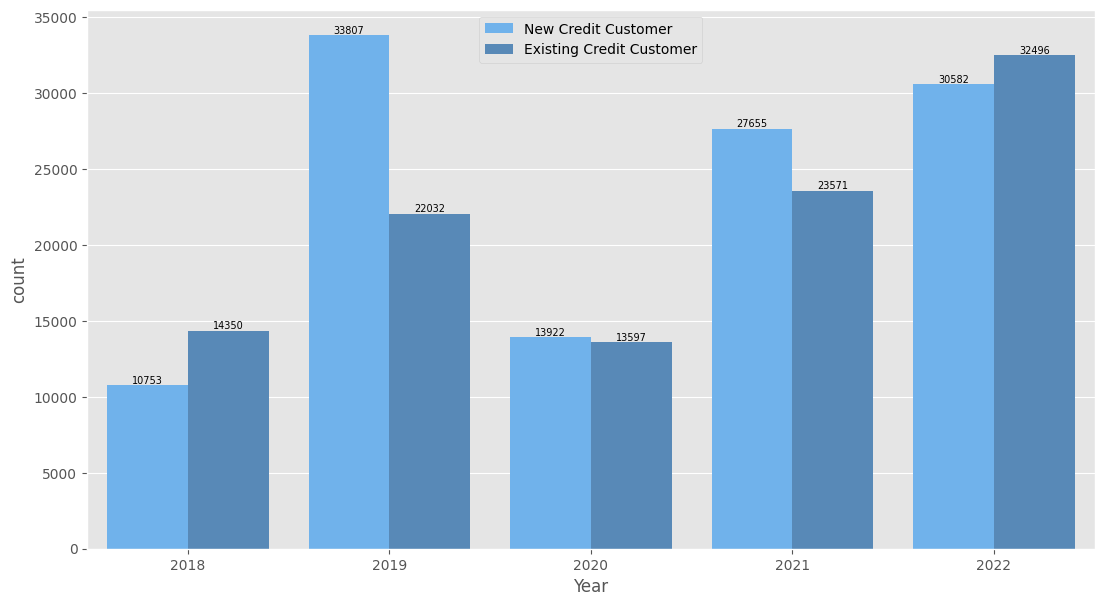

In [13]:
# Số khoản vay theo năm 
Df['Year']= pd.to_datetime(Df['LoanDate']).dt.year
fig = plt.figure(figsize=(13,7))
ax = sns.countplot(data=Df, x='Year',hue='NewCreditCustomer',  palette = ["#5CB3FF","#488AC7"]) #hue='NewCreditCustomer'
for container in ax.containers:
    ax.bar_label(container, fontsize=7)
#plt.title('Số khoản vay trong năm')
ax.legend().set_title('')
plt.show()

Trong 5 năm qua, số khoản vay được phê duyệt có sụ biến động rõ rệt. Số khoản vay tăng nhanh trong năm 2019 và có sự giảm trong năm 2020. Đến năm 2021, số khoản vay tăng lên và đến anmw 2022, số khoản vay đạt 63078 khaorn vay. Điều này là dễ hiểu do, năm 2020, thế giới chịu sự ảnh hưởng của đại dịch Covid 19 và đến năm 2022, bình thường hóa trở lại, số khoản vay cũng tăng lên cùng với nhu cầu ổn đinh kinh tế của các nước.

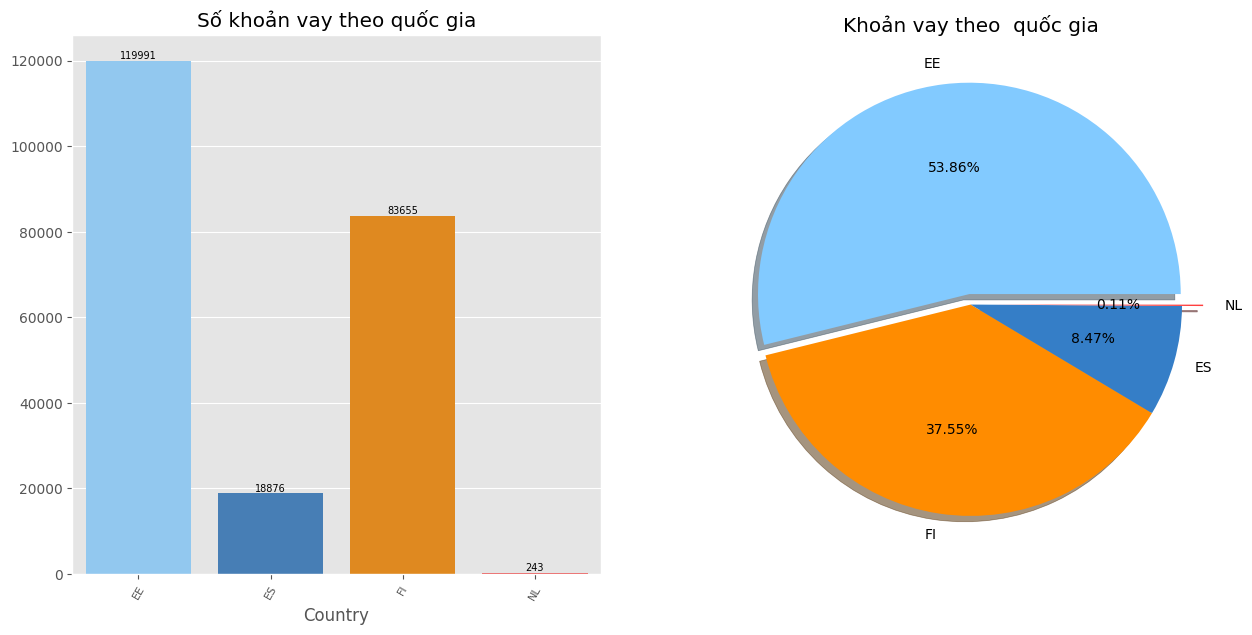

In [7]:
# Số khoản vay theo quốc gia
fig = plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.countplot(data=Df, x='Country',palette= ["#82CAFF","#357EC7","#FF8C00","#FF4040"])
for container in ax.containers:
    ax.bar_label(container, fontsize=7)
plt.title('Số khoản vay theo quốc gia')
plt.xticks(rotation=60,fontsize=8)
plt.ylabel('')

plt.subplot(1,2,2)
plt.title('Khoản vay theo  quốc gia')
plt.pie( Df['Country'].value_counts(),labels=['EE','FI','ES','NL'] ,explode = [0.05, 0, 0, 0.1],colors = ["#82CAFF","#FF8C00","#357EC7","#FF4040"],shadow = True, autopct = '%0.2f%%')
plt.show()

Trong 5 năm qua, ESTONIA là quốc gia có số khoản vay cao nhất với 119991 khoản vay chiếm 53.86%,  số khoản vay ở FinLand (Phần lan) là 83655 khoản vay và chiếm 37.55%, Spain(Tây Ban Nha) với 3279 khoản vay với 2.87% và thấp nhất là NetherLands(Hà Lan)  với 243 khoản vay.

Text(0, 0.5, '')

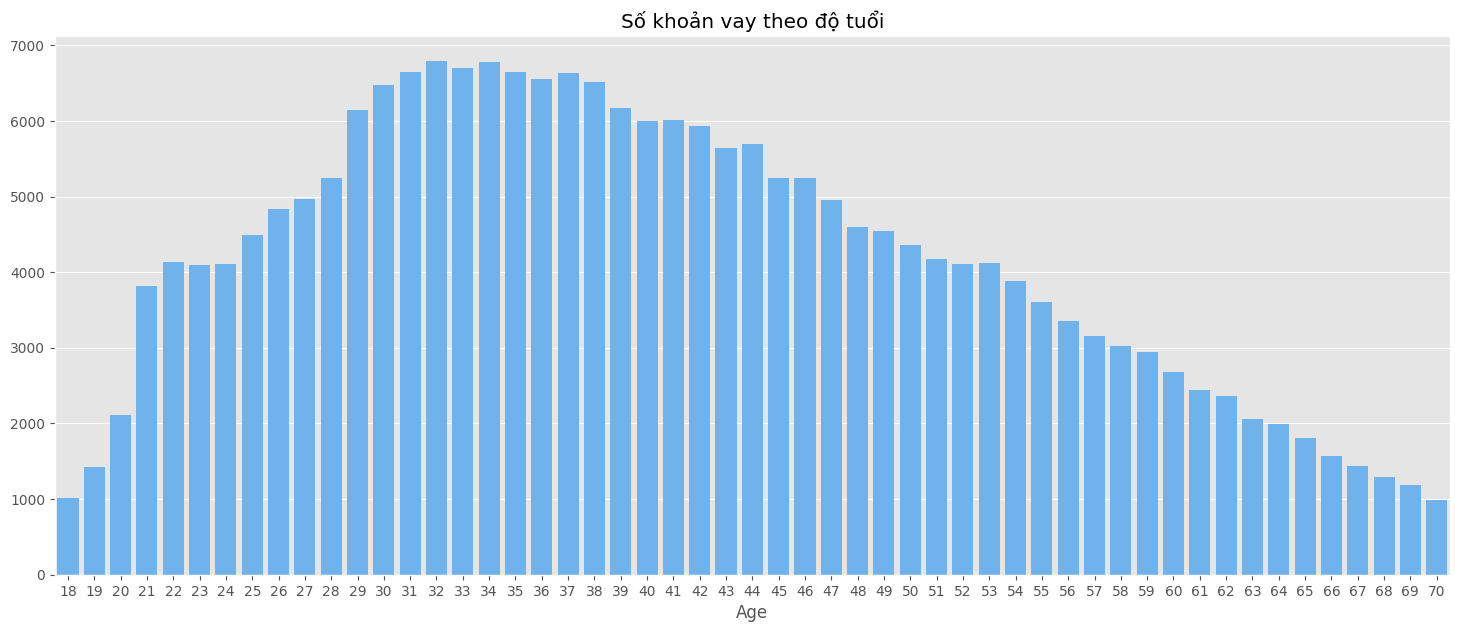

In [9]:
# Số khoản vay theo độ tuổi

fig = plt.figure(figsize=(18,7))
ax = sns.countplot(data=Df, x='Age', color="#5CB3FF")
plt.title('Số khoản vay theo độ tuổi')

plt.ylabel('')

Người tham gia khoản vay của Bondora phải đủ từ 18-70 tuổi. Trong đó, độ tuổi từ 29-45 tuổi là độ tuổi cố xu hướng vay nợ nhiều nhất, điều này cũng sễ hiều vì đây là khoảng tuổi đẹp nhất của giai đoạn trưởng thành, người vay cần vay nhằm mục đích kinh doanh, khám phá. Số khoản vay từ sau 46 tuổi cũng rất lớn, vì đây là giai đoạn chuyển giao giữa trưởng thanh và trung niên, người châu âu xem đây là độ tuổi bắt đầu trung niên, họ cần vay vay nhiều để phục vụ cho mục đích gia đình, chăm lo cho con cái.

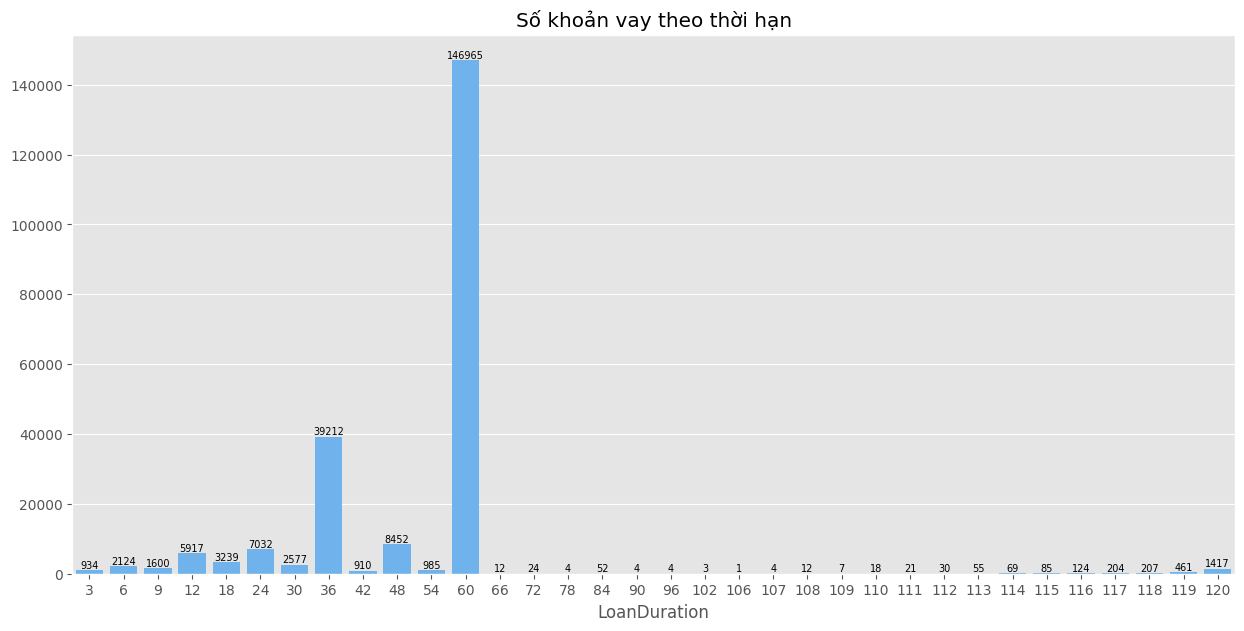

In [29]:
# Số khoản vay theo thời hạn, điểm đánh giá, ngày nợ gốc dài nhất
fig = plt.figure(figsize=(15,7))
ax = sns.countplot(data=Df, x='LoanDuration',color="#5CB3FF")
for container in ax.containers:
    ax.bar_label(container, fontsize=7)
plt.title('Số khoản vay theo thời hạn')
plt.ylabel('')
plt.show()

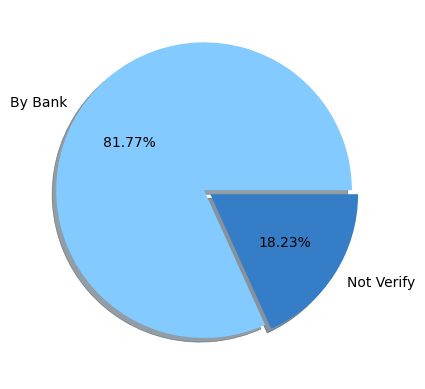

In [26]:
# Khoản vay theo mức Restructured
plt.pie( Df['VerificationType'].value_counts(),labels=['By Bank','Not Verify'] ,explode = [0.05, 0],shadow = True, autopct = '%0.2f%%', colors = ["#82CAFF","#357EC7"] )
plt.show()

Các khoản vay trải dài theo các thời hạn vay từ 3-120 tháng, nhưng phần lớn các khoản vay là 60 tháng hoặc 36 tháng.

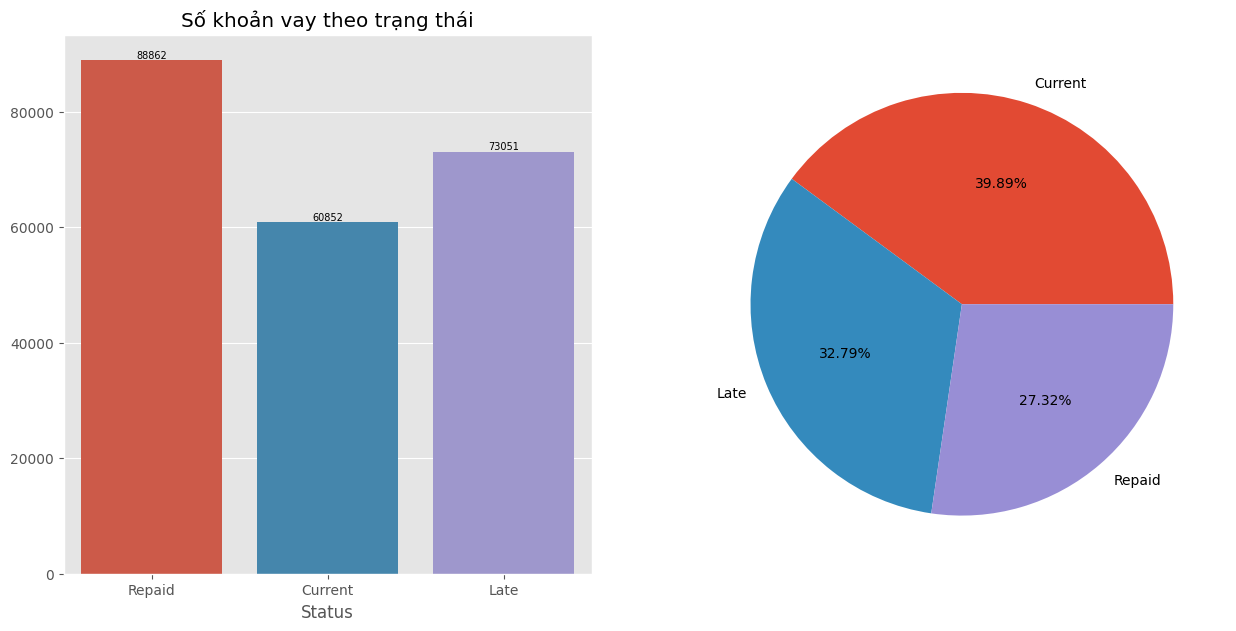

In [9]:
# Khoản vay theo trạng thái
fig = plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.countplot(data=Df, x='Status')
for container in ax.containers:
    ax.bar_label(container, fontsize=7)
plt.title('Số khoản vay theo trạng thái')
plt.ylabel('')
plt.subplot(1,2,2)
# Khoản vay theo mức Restructured
plt.pie( Df['Status'].value_counts(),labels=['Current','Late', "Repaid"] , autopct = '%0.2f%%')
plt.show()

Trong các khoản vay, các khoản vay ở trạng thái hiện tại là lớn nhất, các khoản vay đã trả chiếm 27.32% và các khoản vay muộn thời hạn thanh toán hoặc quá hạn chiếm đến 73051 khoản vay với 33.04%. Đây là con số lớn, ảnh hưởng lớn đến khả năng vỡ nợ của khách hàng và quyết định thu hồi nợ của Bondora.

Text(0, 0.5, '')

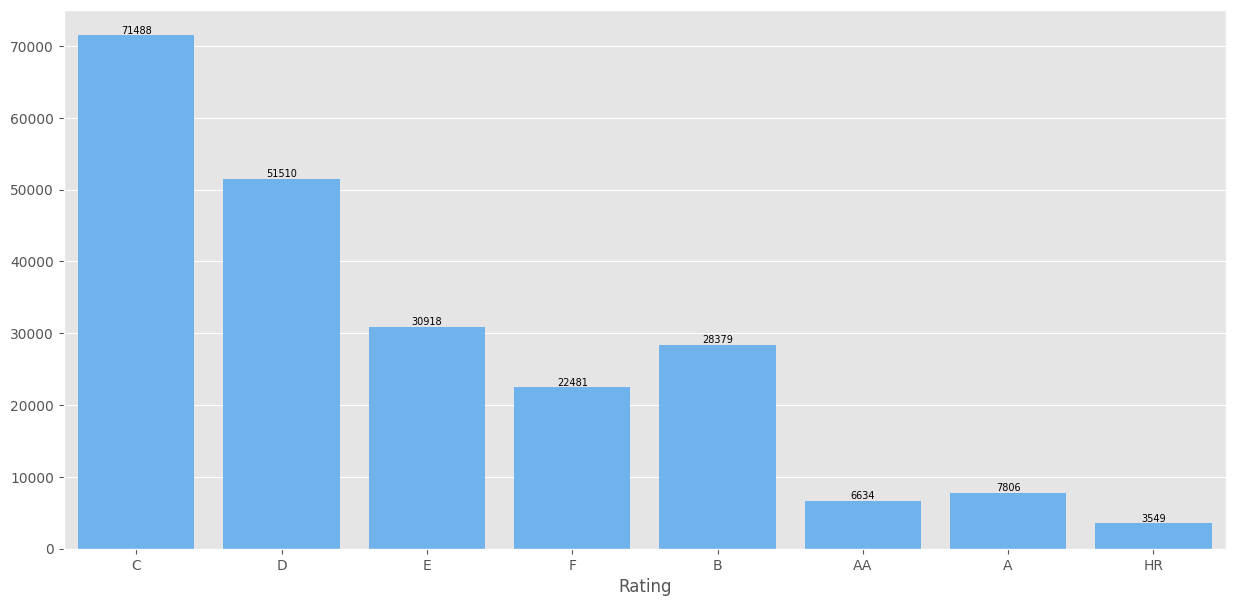

In [12]:
fig = plt.figure(figsize=(15,7))
ax = sns.countplot(data=Df,x="Rating", color="#5CB3FF")
for container in ax.containers:
    ax.bar_label(container, fontsize=7)
plt.ylabel('')


Trong đó, các khoản nợ được đánh giá thang điểm C,D,E là rất nhiều chứng tỏ trạng thái tín dụng của khách hàng tại thời điểm này là không tốt.

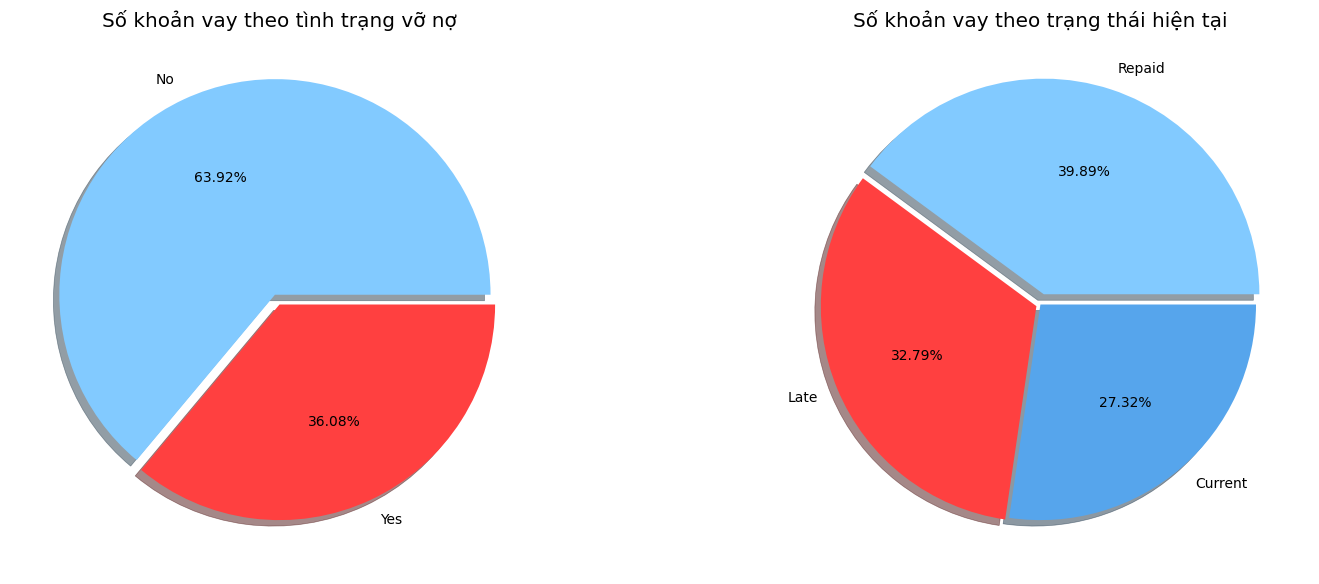

In [51]:
# Theo tình trạng vỡ nợ
fig = plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.pie( Df['DefaultStatus'].value_counts(),labels=['No','Yes'] , explode = [0.05, 0],shadow = True, autopct = '%0.2f%%', colors = ["#82CAFF","#FF4040"])
plt.title('Số khoản vay theo tình trạng vỡ nợ')
plt.subplot(1,2,2)
plt.pie( Df['Status'].value_counts(),labels=['Repaid','Late', "Current"] ,explode = [0.05, 0.02,0],shadow = True, colors = ["#82CAFF","#FF4040","#56A5EC"], autopct = '%0.2f%%')
plt.title('Số khoản vay theo trạng thái hiện tại')
plt.show()

Có tới 36,08% số khoản vay rơi vào tình trạng vỡ nợ, điều này thực sự không tốt gây ảnh hưởng nhiều cho việc thu hồi các khoản vay.

Text(0, 0.5, '')

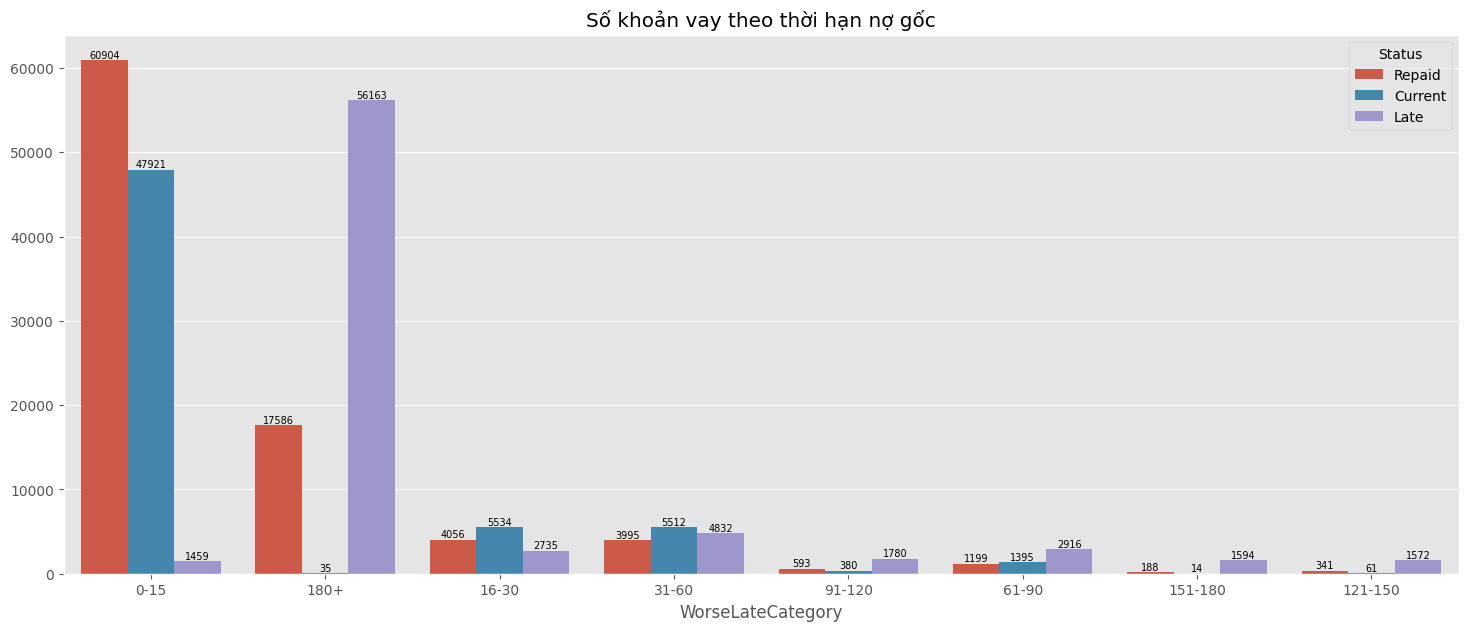

In [12]:
# Số khoản vay theo thời hạn nợ gốc 
fig = plt.figure(figsize=(18,7))
ax = sns.countplot(data=Df,x="WorseLateCategory", hue='Status')
for container in ax.containers:
    ax.bar_label(container, fontsize=7)
plt.title('Số khoản vay theo thời hạn nợ gốc')
plt.ylabel('')

Nhìn chung, các khoản bợ đều nằm trong phạm vi nợ cho phép từ 0-15 ngày là tương đối, nhiều khoản nợ tại thời điểm hiện tại đang duy trì đã có thời gian nợ gốc cao những đã ổn định. Qua đồ thị, trạng thái nợ đi kèm với thời hạn nợ gốc quá 180 ngày rất cao với 56163
 khoản vay. Điều này chứng tỏ các khoản vay này có nguy cơ vỡ nợ rất lớn.

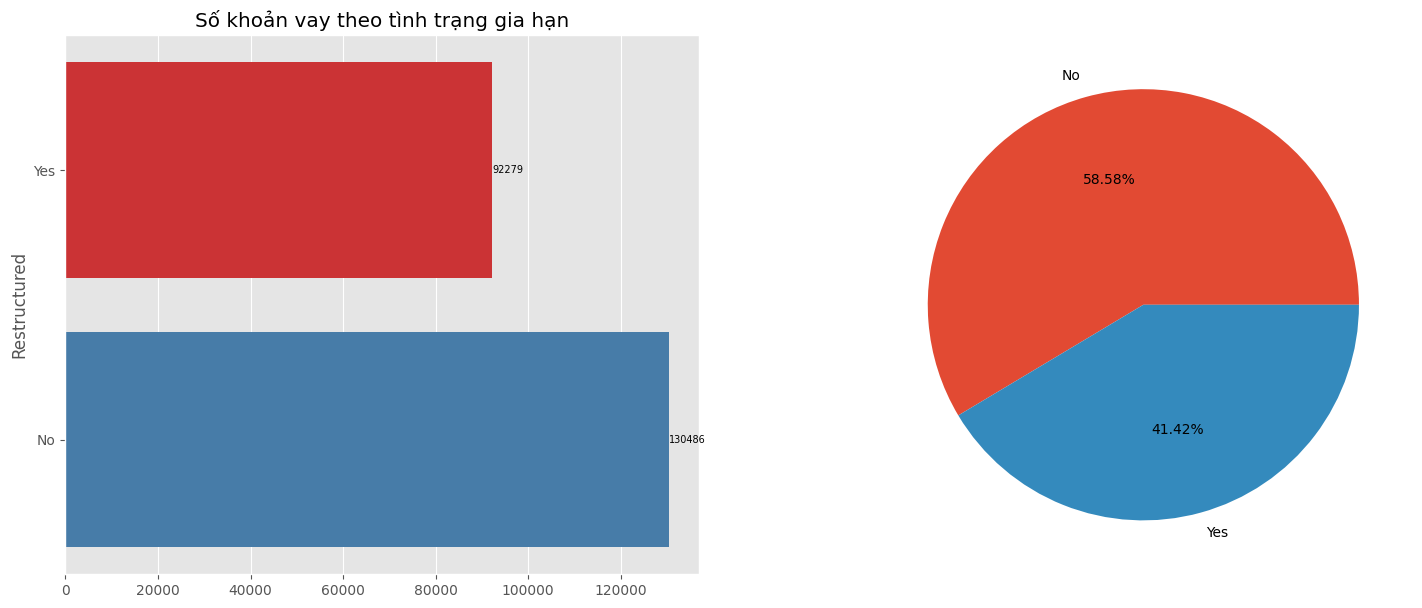

In [13]:
# Phân tích số khoản vay theo trang thái gia hạn
fig = plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
ax= sns.countplot(data=Df, y='Restructured',  palette = "Set1")
for container in ax.containers:
    ax.bar_label(container, fontsize=7)
plt.title('Số khoản vay theo tình trạng gia hạn')
plt.xlabel('')
plt.subplot(1,2,2)
plt.pie( Df['Restructured'].value_counts(),labels=['No','Yes'] , autopct = '%0.2f%%')
plt.show()

Lượng khoản vay gia hạn khá là lớn chiếm 41.42%. Điều này chứng tỏ, tài chính khách hàng không ổn định và quyết định gia hạn để kéo dài thời gian trả nợ.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


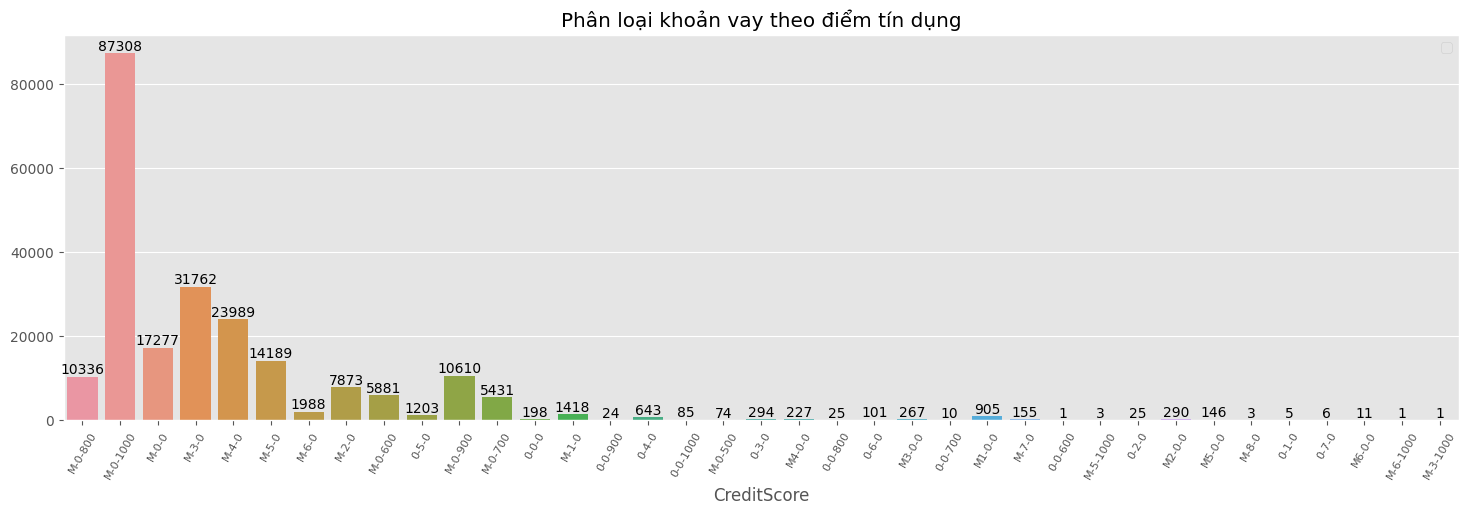

In [14]:
# Số khoản vay theo điểm tín dụng khách hàng 
fig = plt.figure(figsize=(18,5))
ax = sns.countplot(data=Df, x='CreditScore')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Phân loại khoản vay theo điểm tín dụng')
plt.xticks(rotation=60,fontsize=8)
plt.ylabel('')
ax.legend().set_title('')


Đánh giá chúng, số khoản vay theo điểm tín dụng của khách hàng vay đều tương đôí tốt, các khoản vay đều tập trung ở điểm tín dụng mức M và đạt 1000 điểm tín dụng.

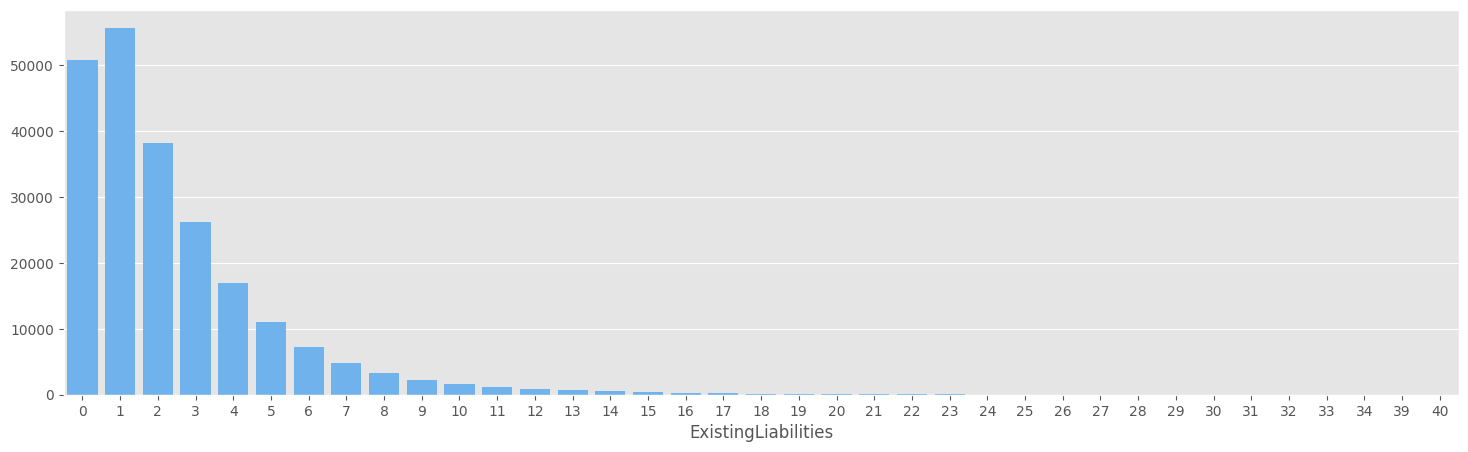

In [22]:
# Số khoản vay theo số nợ hiện tại
fig = plt.figure(figsize=(18, 5))
ax = sns.countplot(data=Df, x='ExistingLiabilities', color="#5CB3FF")

plt.ylabel('')
plt.show()

Text(0, 0.5, '')

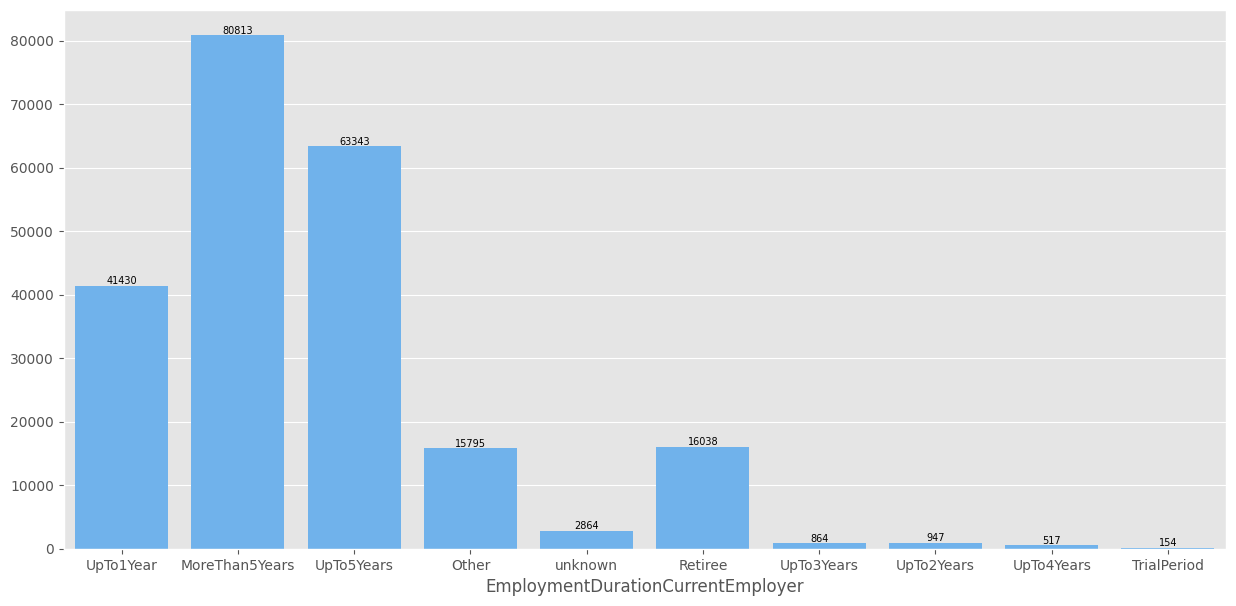

In [4]:
fig = plt.figure(figsize=(15,7))
ax = sns.countplot(data=Df,x="EmploymentDurationCurrentEmployer", color="#5CB3FF")
for container in ax.containers:
    ax.bar_label(container, fontsize=7)
plt.ylabel('')

([<matplotlib.patches.Wedge at 0x13c83d1ab80>,
 [Text(-0.2927804925178825, 1.0603205096578046, 'No'),
  Text(0.2927804925178822, -1.0603205096578046, 'Yes')],
 [Text(-0.15969845046429954, 0.5783566416315297, '58.58%'),
  Text(0.15969845046429934, -0.5783566416315297, '41.42%')])

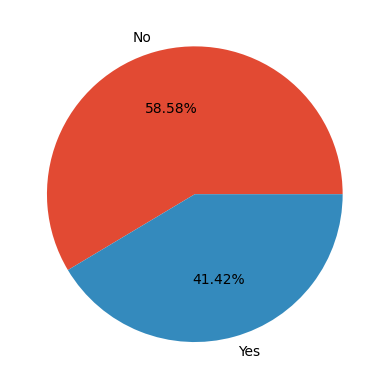

In [16]:
# Số khoản vay 
plt.pie( Df['Restructured'].value_counts(),labels=['No','Yes'] , autopct = '%0.2f%%')

Các khoản vay hầu hết đều là khoản vay duy nhất hoặc thứ 2 của khách hàng.

2. Phân tích đặc trưng

 - Phân tích số tiền vay 

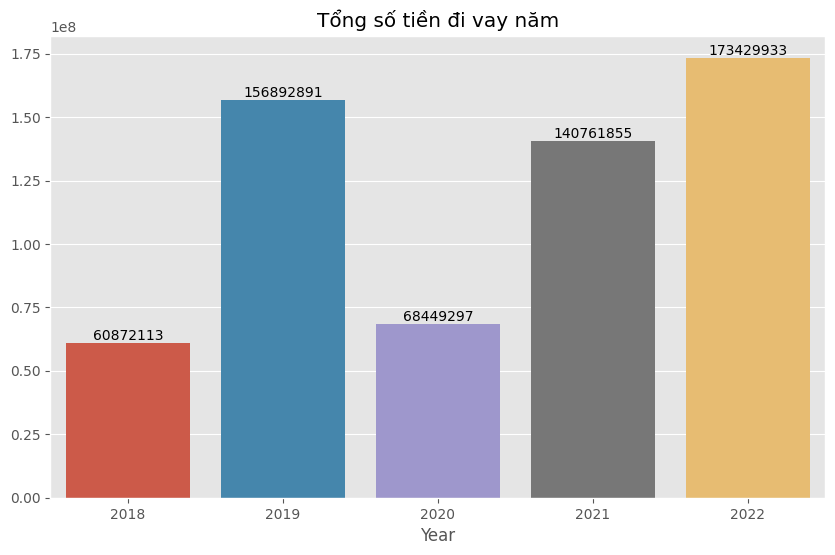

In [17]:
# Phân tích số tổng số tiền cho vay qua từng năm 
loan_amounts_by_year = Df.groupby(Df['Year'])['Amount'].sum().round(2)

# Tạo biểu đồ barplot
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=loan_amounts_by_year.index, y=loan_amounts_by_year.values)

plt.title('Tổng số tiền đi vay năm')
plt.ylabel('')
for i, v in enumerate(loan_amounts_by_year.values):
    ax.text(i, v + 100, str(v), ha='center', va='bottom')
plt.show()

In [33]:
ig = plt.figure(figsize=(18, 5))
plt.plot(Df['LoanDate'], Df['Amount'], label='Số tiền đã phê duyệt', marker='o')

# Vẽ đường số tiền xin vay
plt.plot(Df['LoanDate'], Df['AppliedAmount'], label='Số tiền xin vay', marker='o')
# Đặt tiêu đề cho đồ thị
plt.title('Số tiền đã phê duyệt và số tiền xin vay theo thời gian')

# Đặt nhãn cho trục x và trục y
plt.xlabel('Thời gian')
plt.ylabel('Số tiền (USD)')

# Hiển thị chú thích
plt.legend()

# Hiển thị đồ thị
plt.show()

KeyboardInterrupt: 

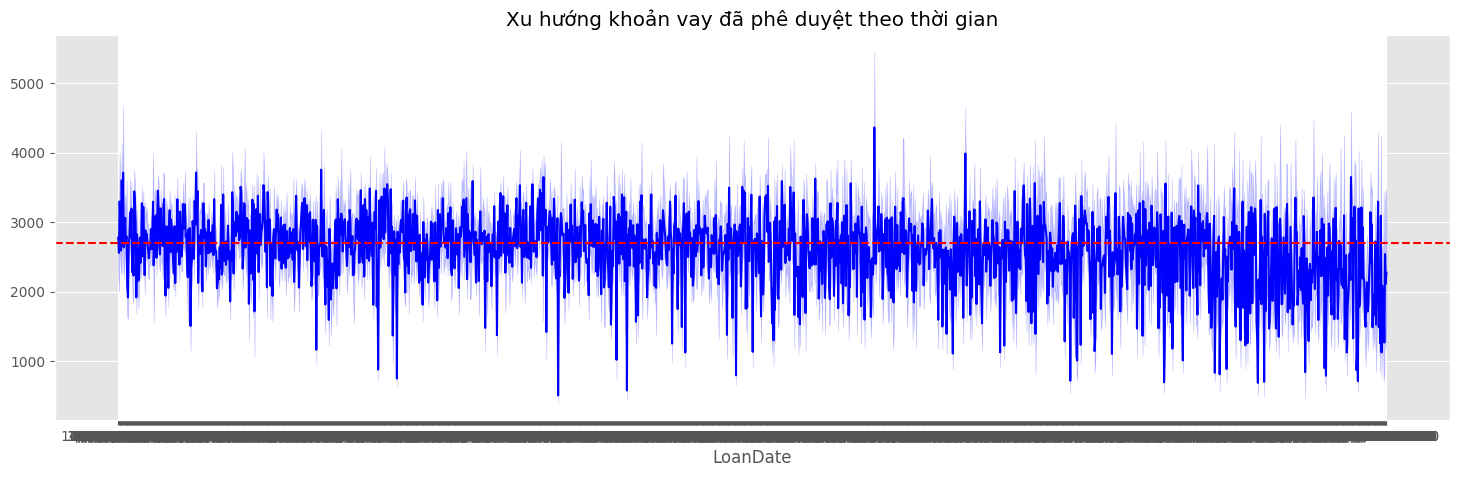

In [61]:
# Phân tích số tiền đi vay theo thời hạn
ig = plt.figure(figsize=(18, 5))
ax = sns.lineplot(data=Df, x='LoanDate', y='Amount',color='blue')
mean_line = Df['Amount'].mean()
plt.axhline(mean_line, color='red', linestyle='--', label='Đường trung bình')
plt.title('Xu hướng khoản vay đã phê duyệt theo thời gian')
plt.ylabel('')
plt.show()

Hầu hết, số tiền đi vay lớn tạp trung ở giai đoạn vay từ 60-80 tháng.

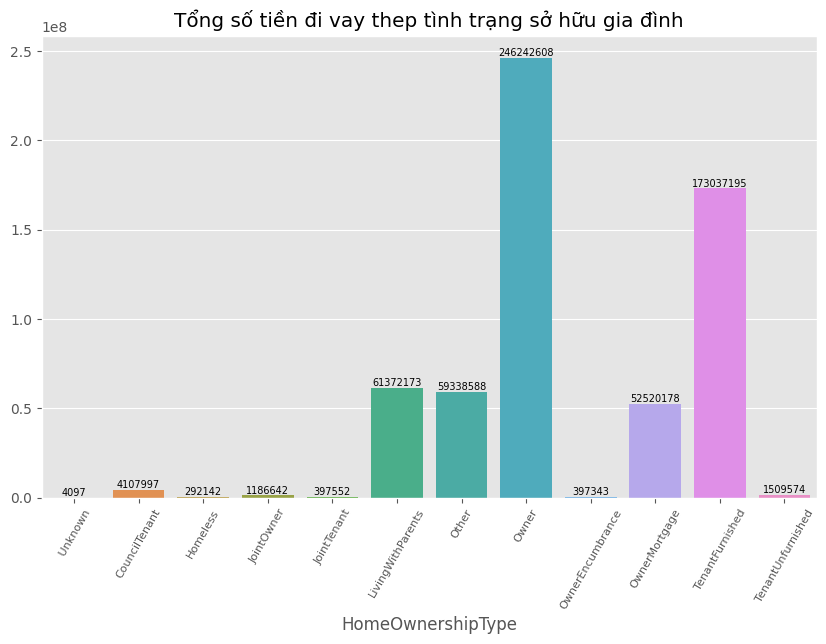

In [19]:
# Phân tích số tổng số tiền cho vay qua từng năm 
loan_amounts_by_home = Df.groupby(Df['HomeOwnershipType'])['Amount'].sum().round(2)

# Tạo biểu đồ barplot
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=loan_amounts_by_home.index, y=loan_amounts_by_home.values)

plt.title('Tổng số tiền đi vay thep tình trạng sở hữu gia đình')
plt.ylabel('')
for i, v in enumerate(loan_amounts_by_home.values):
    ax.text(i, v + 100, str(v), ha='center', va='bottom',fontsize=7)
plt.xticks(rotation=60,fontsize=8)
plt.show()


Trong các tình trạng sở hữu gia đình, tổng số tiền vay mà Bondora cho vay những khoản vay thuộc là chủ sở hữu giá đình là lớn nhất, sau đó là những người đang phải ở nhà thuê, người sông cùng gia đình và đang phải thế chấp nhà. Từ đó, cho thấy mức độ rủi ro trong khoản vay

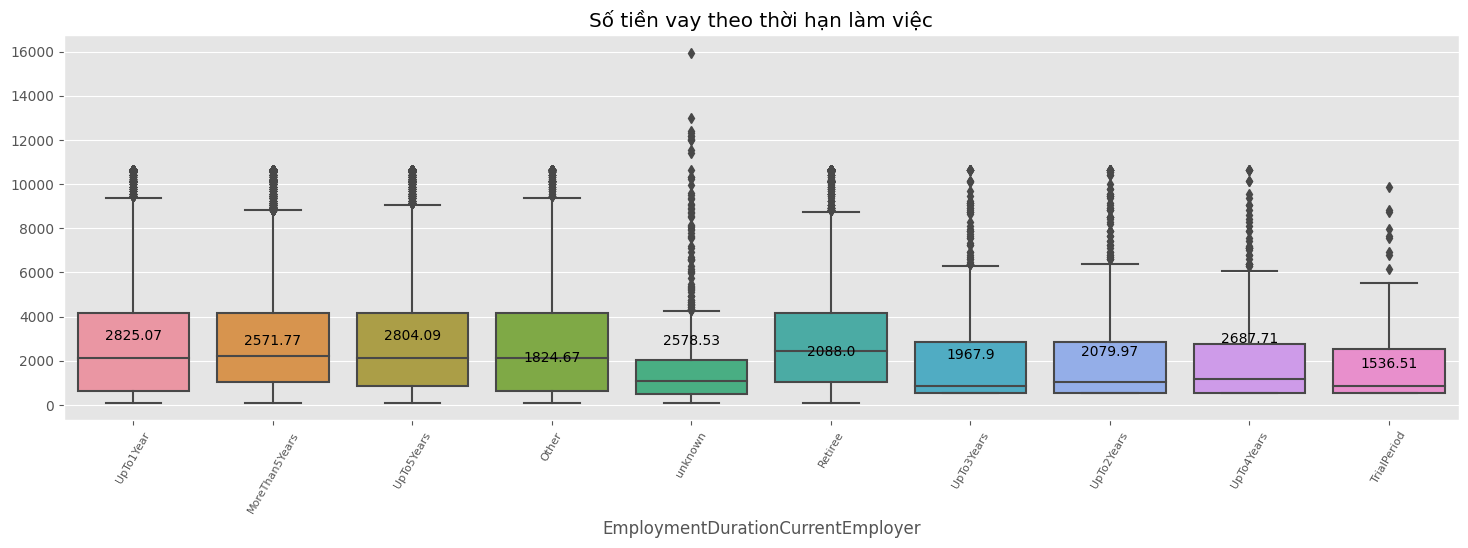

In [20]:
# Số tiền vay theo thời hạn làm việc
fig = plt.figure(figsize=(18, 5))
ax = sns.boxplot(data=Df, x='EmploymentDurationCurrentEmployer', y='Amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, fontsize=8)
# Tính số tiền trung bình theo loại sở hữu gia đình
mean_amounts = Df.groupby('EmploymentDurationCurrentEmployer')['Amount'].mean().round(2)

# Hiển thị số tiền trung bình trên đồ thị
for i, mean in enumerate(mean_amounts):
    ax.text(i, mean, str(mean), ha='center', va='bottom')
plt.title('Số tiền vay theo thời hạn làm việc')
plt.ylabel('')
plt.show()

Số tiền vay trung bình cho những khách hàng từ giới một năm kinh nghiệm và từ 5 năm làm việc là lớn nhât.

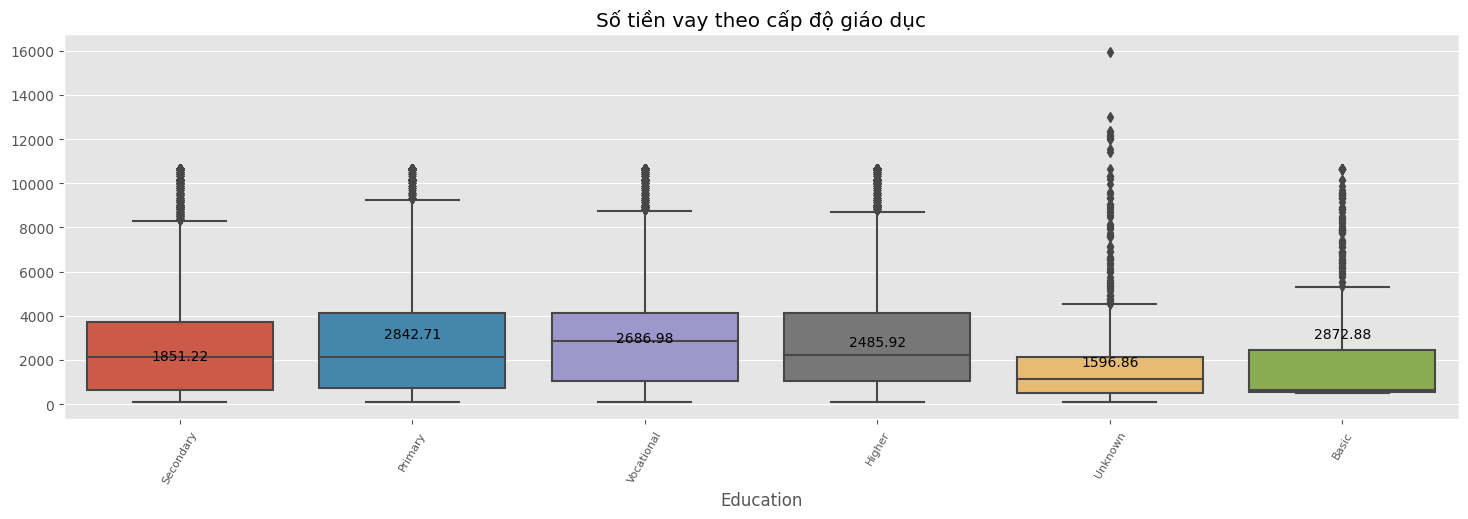

In [21]:
# Số tiền vay trung bình theo cấp độ giáo dục
fig = plt.figure(figsize=(18, 5))
ax = sns.boxplot(data=Df, x='Education', y='Amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, fontsize=8)
# Tính số tiền trung bình theo loại sở hữu gia đình
mean_amounts = Df.groupby('Education')['Amount'].mean().round(2)

# Hiển thị số tiền trung bình trên đồ thị
for i, mean in enumerate(mean_amounts):
    ax.text(i, mean, str(mean), ha='center', va='bottom')
plt.title('Số tiền vay theo cấp độ giáo dục')
plt.ylabel('')
plt.show()

Giường như ở mọi trình độ giáo dục thì có mức vay trung bình tuowg ứng bằng nhau.

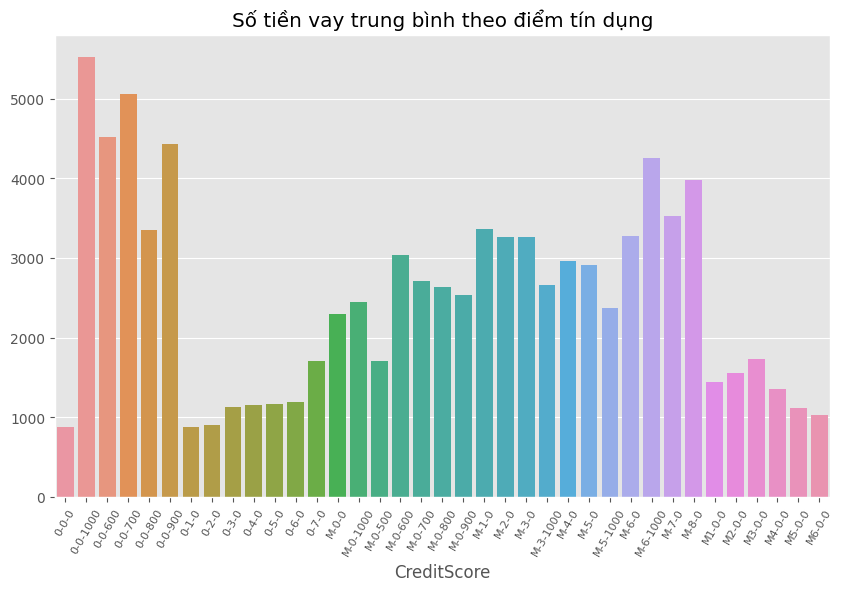

In [22]:
# Phân bố số tiền vay theo số điểm tín dụng
loan_amounts_by_year = Df.groupby(Df['CreditScore'])['Amount'].mean().round(2)

# Tạo biểu đồ barplot
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=loan_amounts_by_year.index, y=loan_amounts_by_year.values)

plt.title('Số tiền vay trung bình theo điểm tín dụng')
plt.ylabel('')
plt.xticks(rotation=60,fontsize=8)
plt.show()

Những khách hàng có điểm tín dụng cao thì được vay số tiền lớn hơn, ngược lại điểm tín dụng càng thấp thì số tiền cho vay sẽ ít.

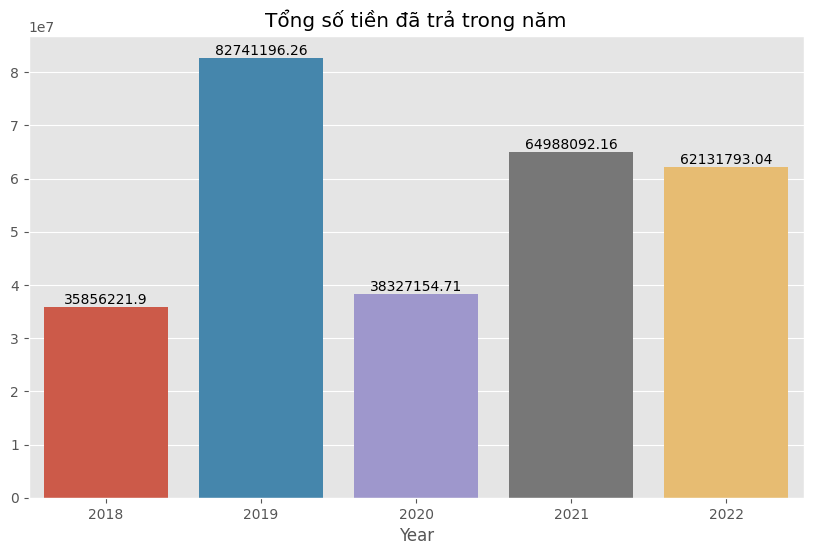

In [23]:
# Phân tích số tổng số tiền đã trả qua từng năm 
loan_amounts_by_year = Df.groupby(Df['Year'])['PrincipalPaymentsMade'].sum().round(2)

# Tạo biểu đồ barplot
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=loan_amounts_by_year.index, y=loan_amounts_by_year.values)

plt.title('Tổng số tiền đã trả trong năm')
plt.ylabel('')
for i, v in enumerate(loan_amounts_by_year.values):
    ax.text(i, v + 100, str(v), ha='center', va='bottom')
plt.show()

- Phân tích lãi suất theo điểm tín dụng, thời hạn, số tiền vay

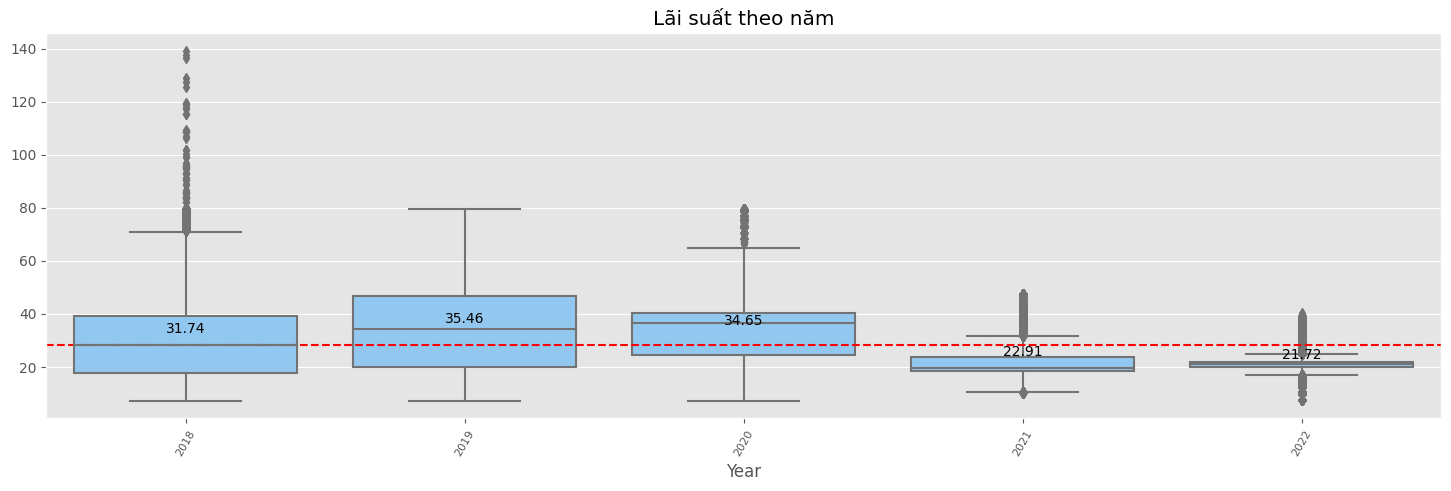

In [59]:
fig = plt.figure(figsize=(18, 5))
ax = sns.boxplot(data=Df, x='Year', y='Interest',color= "#82CAFF")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, fontsize=8)
# Tính số tiền trung bình theo loại sở hữu gia đình
mean_internet = Df.groupby('Year')['Interest'].mean().round(2)

# Hiển thị số tiền trung bình trên đồ thị
for i, mean in enumerate(mean_internet):
    ax.text(i, mean, str(mean), ha='center', va='bottom')
plt.title('Lãi suất theo năm')
mean_line = Df['Interest'].mean()
plt.axhline(mean_line, color='red', linestyle='--', label='Đường trung bình')
plt.ylabel('')
plt.show()

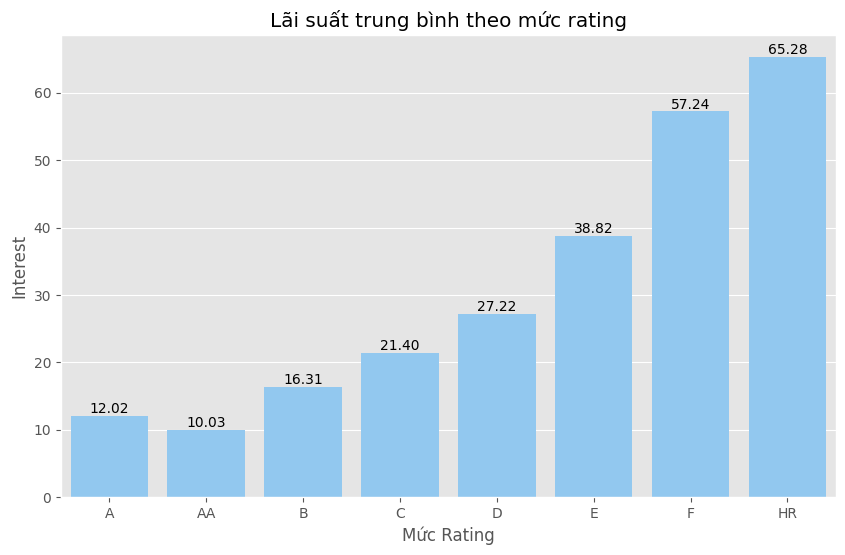

In [60]:
# Tính lãi suất trung bình cho từng mức rating
mean_interest_by_rating = Df.groupby('Rating')['Interest'].mean().reset_index()

# Tạo đối tượng figure với kích thước
fig = plt.figure(figsize=(10, 6))

# Vẽ biểu đồ cột lãi suất trung bình theo mức rating
ax = sns.barplot(data=mean_interest_by_rating, x='Rating', y='Interest', color='#82CAFF')

# Đặt tiêu đề cho biểu đồ
plt.title('Lãi suất trung bình theo mức rating')
for index, row in mean_interest_by_rating.iterrows():
    ax.text(index, row['Interest'], f"{row['Interest']:.2f}", ha='center', va='bottom')
# Đặt nhãn cho trục x và trục y
plt.xlabel('Mức Rating')

# Hiển thị biểu đồ
plt.show()

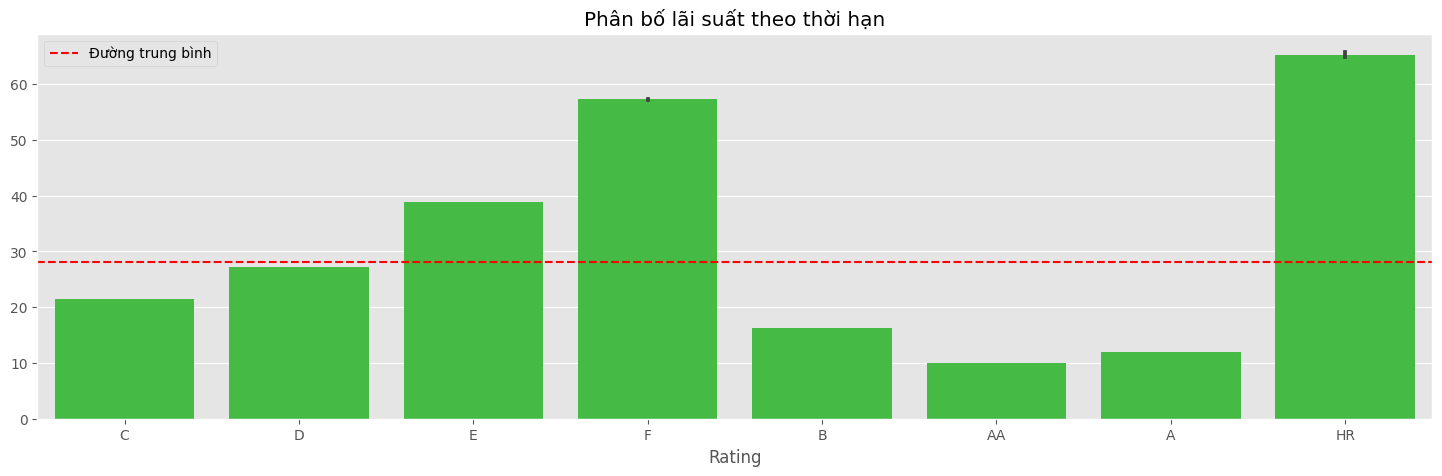

In [52]:
fig = plt.figure(figsize=(18, 5))

# Vẽ biểu đồ cột với chỉ số đường trung bình
ax = sns.barplot(data=Df, x='Rating', y='Interest', color='limegreen')

# Vẽ đường trung bình
mean_line = Df['Interest'].mean()
plt.axhline(mean_line, color='red', linestyle='--', label='Đường trung bình')

# Đặt tiêu đề cho biểu đồ
plt.title('Phân bố lãi suất theo mức rủi ro')

# Đặt nhãn cho trục y
plt.ylabel('')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

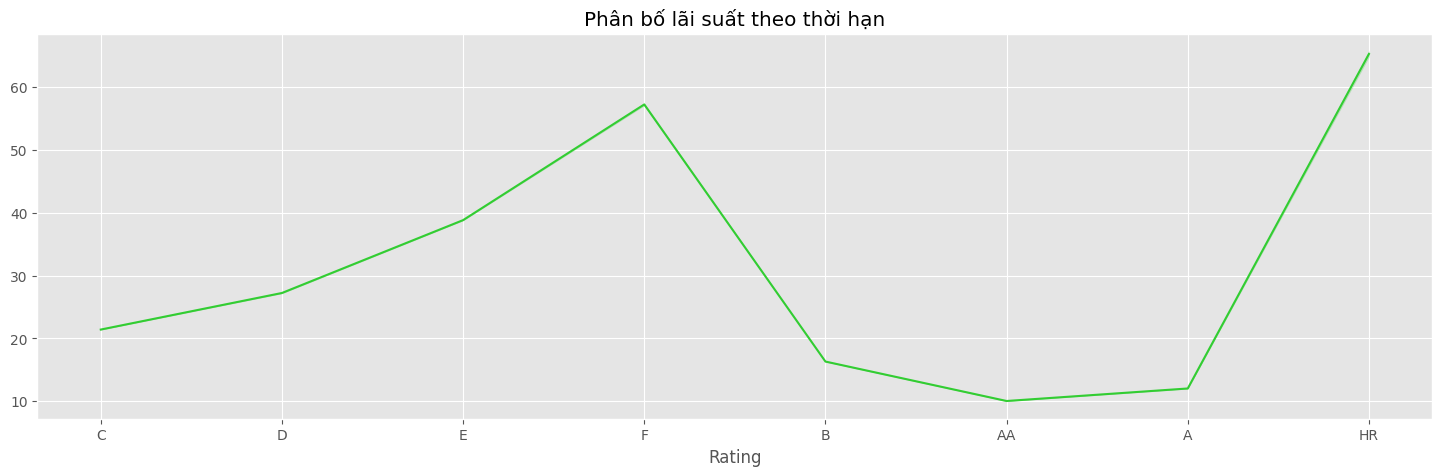

In [37]:
# Phân bố mức lãi suất theo thời hạn
ig = plt.figure(figsize=(18, 5))
ax = sns.lineplot(data=Df, x='Rating', y='Interest',color='limegreen')
plt.title('Phân bố lãi suất theo thời hạn')
plt.ylabel('')
plt.show()


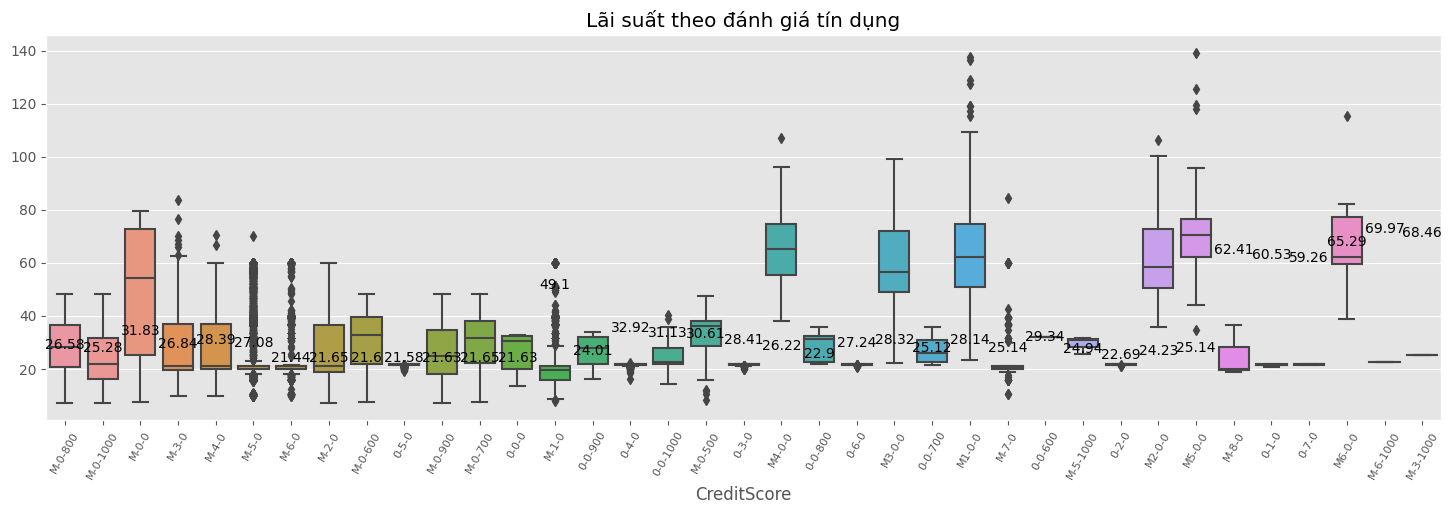

In [26]:
# Phân bố lãi suất theo điểm tín dụng
fig = plt.figure(figsize=(18, 5))
ax = sns.boxplot(data=Df, x='CreditScore', y='Interest')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, fontsize=8)
# Tính số tiền trung bình theo loại sở hữu gia đình
mean_amounts = Df.groupby('CreditScore')['Interest'].mean().round(2)

# Hiển thị số tiền trung bình trên đồ thị
for i, mean in enumerate(mean_amounts):
    ax.text(i, mean, str(mean), ha='center', va='bottom')
plt.title('Lãi suất theo đánh giá tín dụng')
plt.ylabel('')
plt.show()

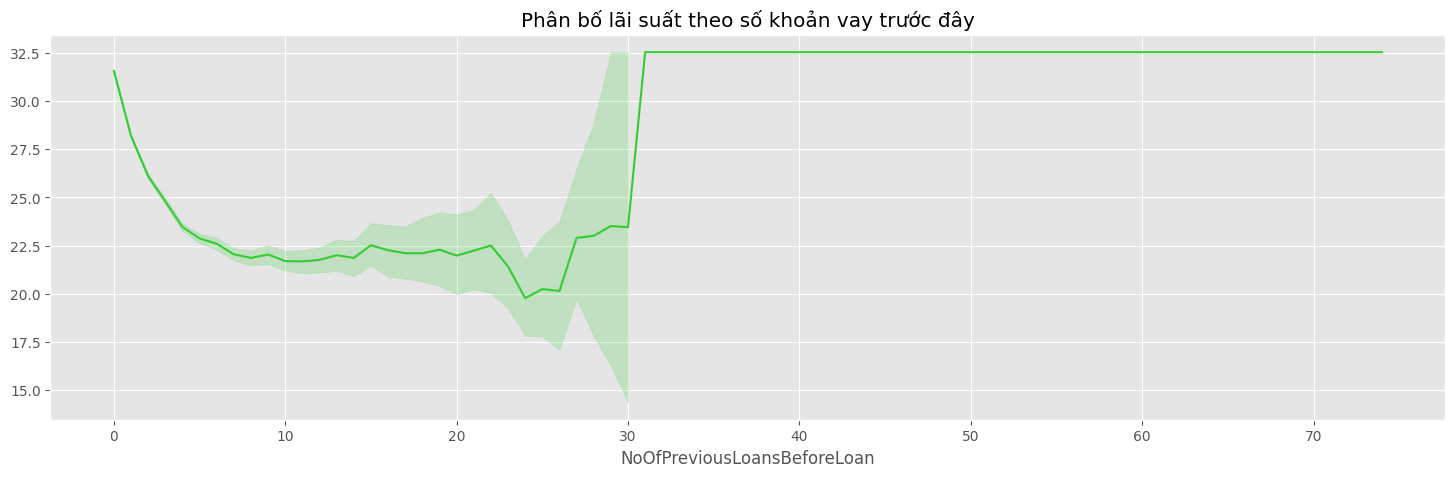

In [27]:
# Phân tích lãi suất theo số khoản vay trước đây
ig = plt.figure(figsize=(18, 5))
ax = sns.lineplot(data=Df, x='NoOfPreviousLoansBeforeLoan', y='Interest',color='limegreen')
plt.title('Phân bố lãi suất theo số khoản vay trước đây')
plt.ylabel('')
plt.show()


Số khoản vay trươc đây càng lớn hoặc không có thì lãi suất càng cao. Điều này dễ hiểu vì, Bondora muốn kiểm soát rủi ro với những khoản vay của người mới và những người đã từng vay nhiều nếu có lịch sử tín dụng không tốt.

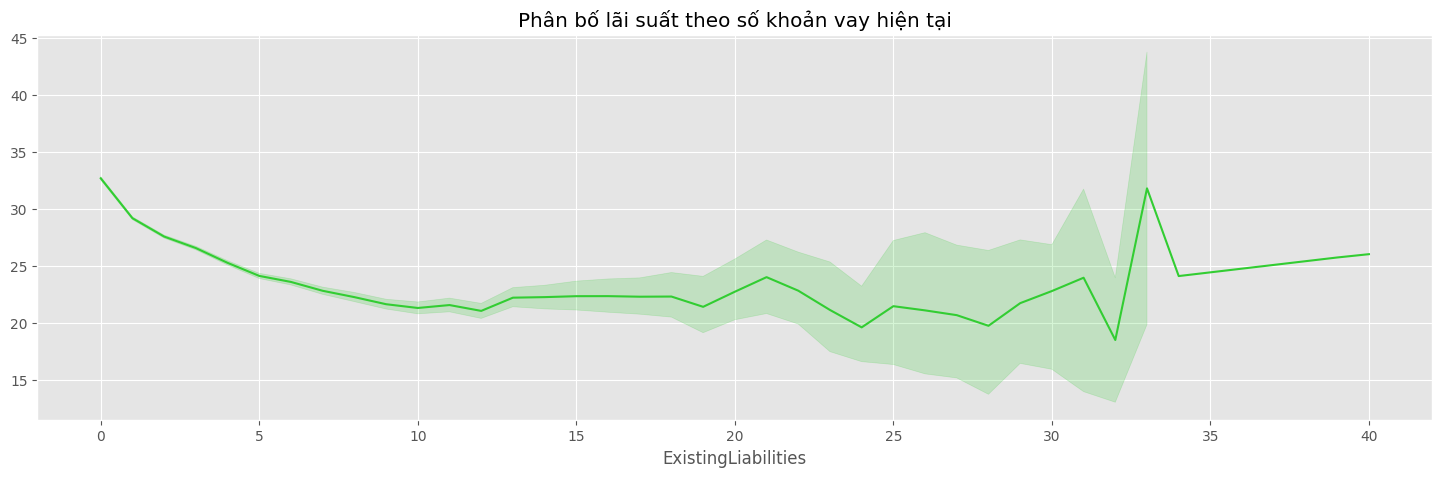

In [28]:
ig = plt.figure(figsize=(18, 5))
ax = sns.lineplot(data=Df, x='ExistingLiabilities', y='Interest',color='limegreen')
plt.title('Phân bố lãi suất theo số khoản vay hiện tại')
plt.ylabel('')
plt.show()

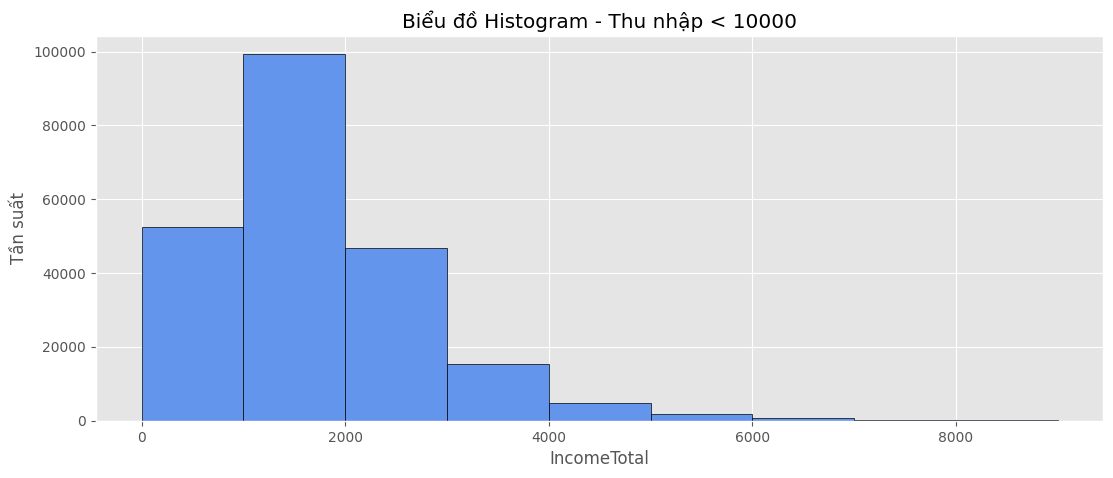

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13, 5))
plt.hist(Df['IncomeTotal'], bins=range(0, 10000, 1000), edgecolor='black', color='#6495ED')
plt.title('Biểu đồ Histogram - Thu nhập < 10000')
plt.xlabel('IncomeTotal')
plt.ylabel('Tần suất')

plt.xticks(range(0, 10000, 2000))

plt.show()

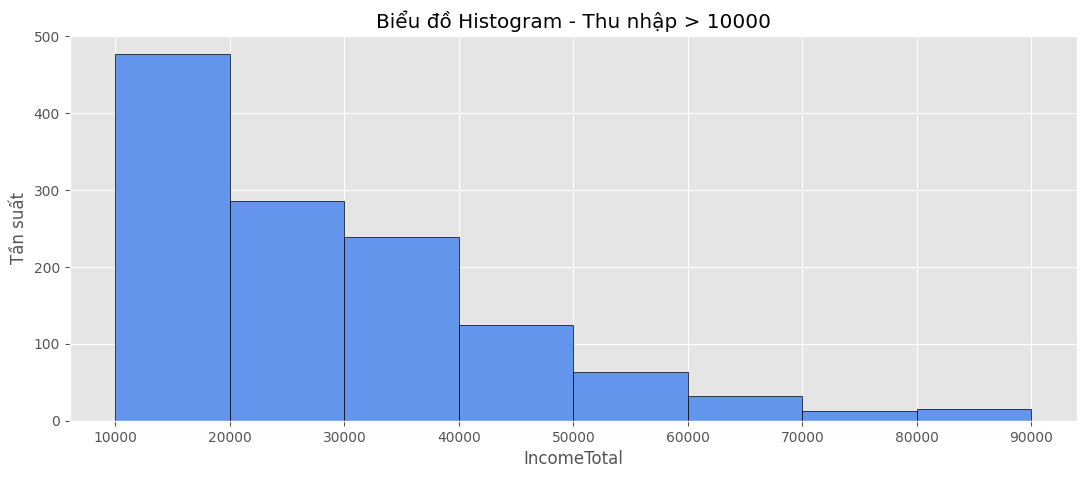

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13, 5))
plt.hist(Df['IncomeTotal'], bins=range(10000, 100000, 10000), edgecolor='black', color='#6495ED')
plt.title('Biểu đồ Histogram - Thu nhập > 10000')
plt.xlabel('IncomeTotal')
plt.ylabel('Tần suất')

plt.xticks(range(10000, 100000, 10000))

plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13, 5))
plt.hist(Df['IncomeTotal'], bins=range(20000, 50000, 1000), edgecolor='black', color='#6495ED')
#plt.title('Biểu đồ Histogram - Thu nhập')
plt.xlabel('IncomeTotal')
plt.ylabel('Tần suất')

plt.xticks(range(20000, 50000, 2000))

plt.show()

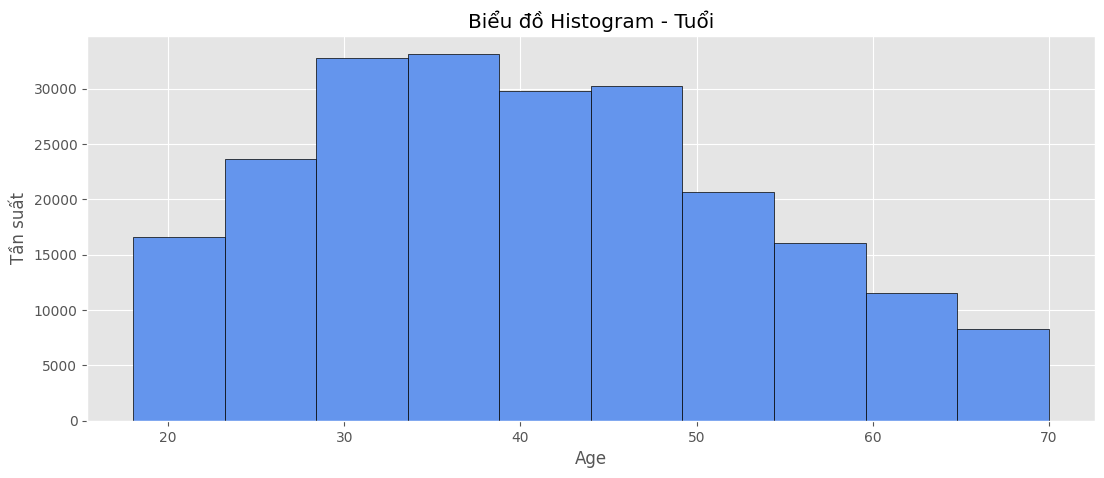

In [20]:
fig = plt.figure(figsize=(13, 5))
plt.hist(Df['Age'], edgecolor='black', color='#6495ED')
plt.title('Biểu đồ Histogram - Tuổi')
plt.xlabel('Age')
plt.ylabel('Tần suất')

plt.show()

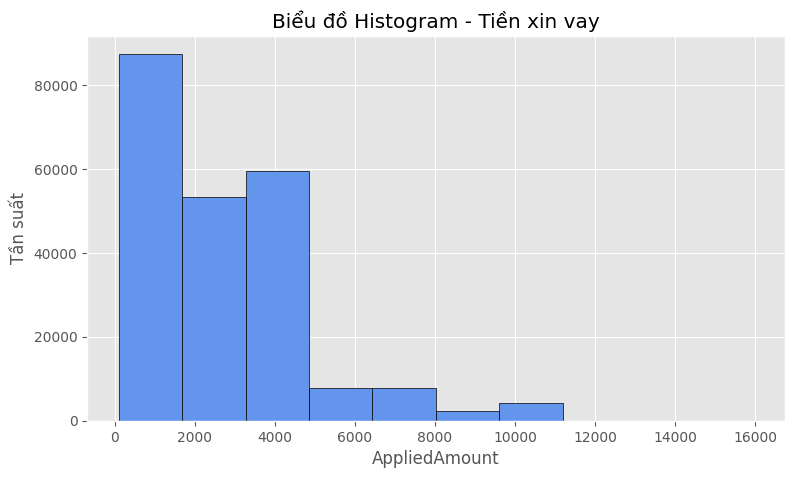

In [9]:
fig = plt.figure(figsize=(9, 5))
plt.hist(Df['AppliedAmount'], edgecolor='black', color='#6495ED')
plt.title('Biểu đồ Histogram - Tiền xin vay')
plt.xlabel('AppliedAmount')
plt.ylabel('Tần suất')

plt.show()

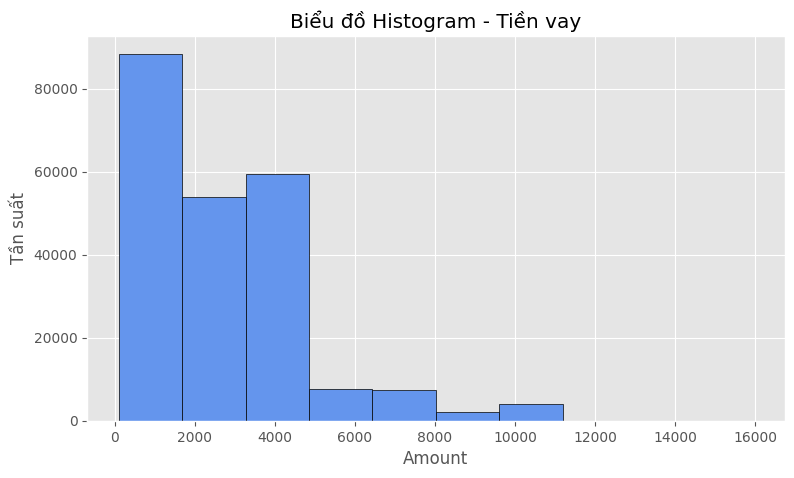

In [14]:
fig = plt.figure(figsize=(9, 5))
plt.hist(Df['Amount'], edgecolor='black', color='#6495ED')
plt.title('Biểu đồ Histogram - Tiền vay')
plt.xlabel('Amount')
plt.ylabel('Tần suất')

plt.show()

Dường như, số khoản vay hiện tại không ảnh hưởng quá nhiều đến lãi suất

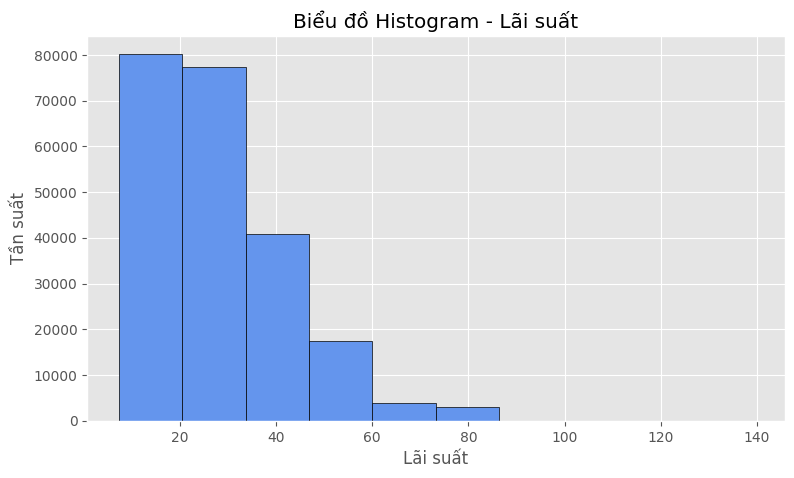

In [13]:
fig = plt.figure(figsize=(9, 5))
plt.hist(Df['Interest'], edgecolor='black', color='#6495ED')
plt.title('Biểu đồ Histogram - Lãi suất')
plt.xlabel('Lãi suất')
plt.ylabel('Tần suất')

plt.show()

In [4]:
# Data Analysis 
Df1= Df[['Age','AppliedAmount','Amount','Interest','LoanDuration',
        'MonthlyPayment','IncomeTotal']]
Df1.describe()

,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal
count,222765.000000,222765.000000,222765.000000,222765.000000,222765.000000,222765.000000,2.227650e+05
mean,40.677158,2725.919916,2695.244266,28.164557,51.452944,100.593255,2.036128e+03
std,12.417920,2156.474640,2132.704392,14.466119,16.599487,85.981349,1.166066e+04
min,18.000000,103.000000,103.000000,7.260000,3.000000,1.220000,0.000000e+00
25%,31.000000,850.000000,850.000000,18.910000,36.000000,35.200000,1.000000e+03
50%,39.000000,2126.000000,2126.000000,21.770000,60.000000,91.250000,1.450000e+03
75%,50.000000,4150.000000,4150.000000,36.400000,60.000000,126.260000,2.200000e+03
max,70.000000,15948.000000,15948.000000,139.210000,120.000000,1871.460000,1.012019e+06


#. Phân tích tương quan

Text(0.5, 0, 'Interest')

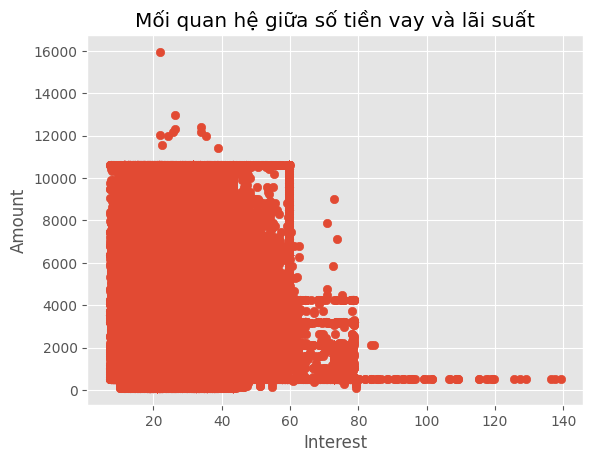

In [31]:
# Tương quan giữa số tiền vay và lãi suất
plt.scatter( x = Df['Interest'], y = Df['Amount'])

# Đặt tiêu đề và nhãn trục
plt.title("Mối quan hệ giữa số tiền vay và lãi suất")
plt.ylabel("Amount")
plt.xlabel("Interest")

tùy thuộc vào các đặc tính khác của khách hàng sẽ có một mức lãi suất riêng, không có quá nhiều sự tương quan giữa số tiền và lãi suất, điều này còn phụ thuộc vào các yếu tố khác.

Text(0.5, 0, 'LoanDuration')

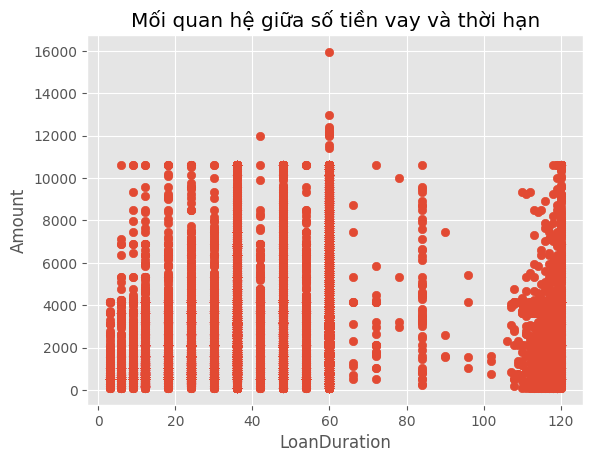

In [32]:
# Tương quan giữa số tiền vay và thời hạn
plt.scatter( x = Df['LoanDuration'], y = Df['Amount'])

# Đặt tiêu đề và nhãn trục
plt.title("Mối quan hệ giữa số tiền vay và thời hạn")
plt.ylabel("Amount")
plt.xlabel("LoanDuration")

Text(0.5, 0, 'PrincipalPaymentsMade')

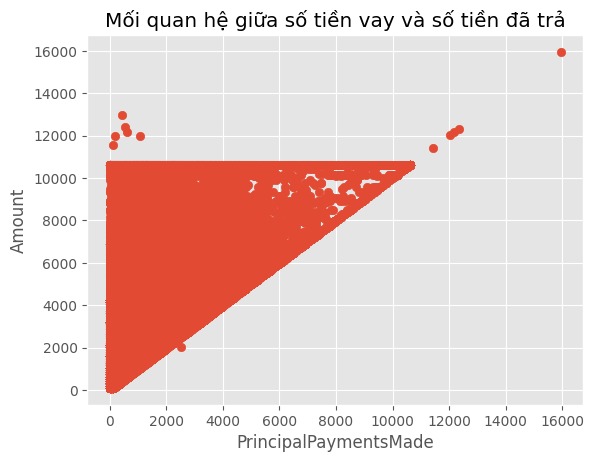

In [4]:
# Tương quan giữa số tiền vay và số tiền gốc đã trả
plt.scatter( x = Df['PrincipalPaymentsMade'], y = Df['Amount'])

# Đặt tiêu đề và nhãn trục
plt.title("Mối quan hệ giữa số tiền vay và số tiền đã trả")
plt.ylabel("Amount")
plt.xlabel("PrincipalPaymentsMade")

Text(0.5, 0, 'CreditScore')

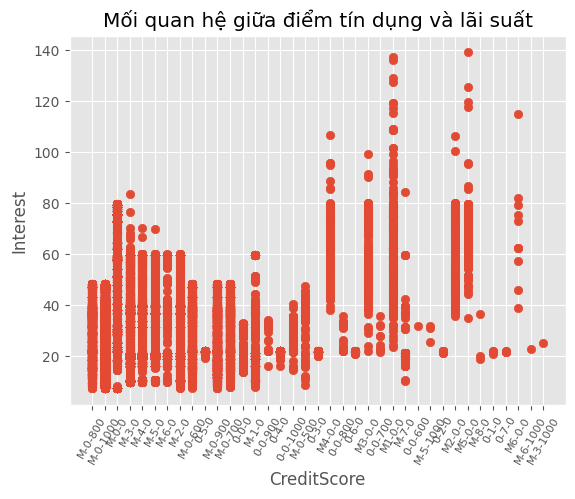

In [34]:
# Tương quan giữa lãi suất và điểm tín dụng

plt.scatter( x = Df['CreditScore'], y = Df['Interest'])

# Đặt tiêu đề và nhãn trục
plt.title("Mối quan hệ giữa điểm tín dụng và lãi suất")
plt.ylabel("Interest")
plt.xticks(rotation=60,fontsize=8)
plt.xlabel("CreditScore")

Điểm tín dụng càng tốt thì mức lãi suất càng thấp.

Text(0, 0.5, 'MonthlyPayment')

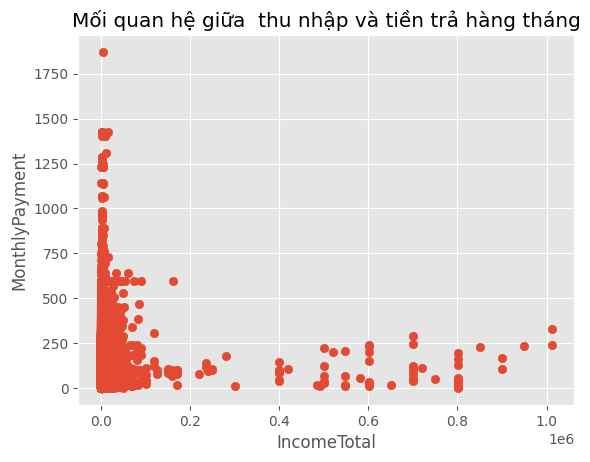

In [35]:
# Tương quan giữa thu nhập và số tiền phải trả hàng tháng
plt.scatter( x = Df['IncomeTotal'], y = Df['MonthlyPayment'])

# Đặt tiêu đề và nhãn trục
plt.title("Mối quan hệ giữa  thu nhập và tiền trả hàng tháng")
plt.xlabel("IncomeTotal")
plt.ylabel("MonthlyPayment")

Text(0, 0.5, 'Interest')

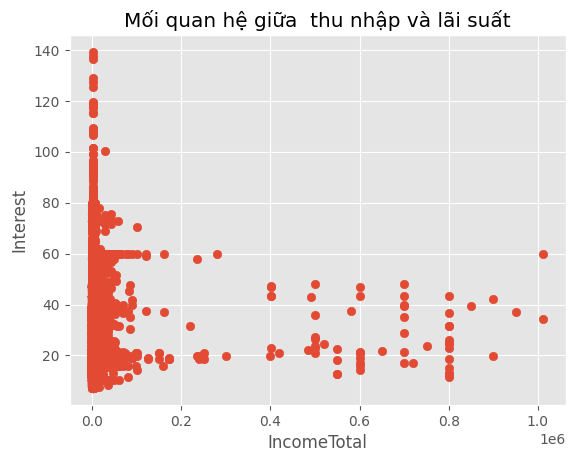

In [36]:
# Tương quan giữa thu nhập và số tiền phải trả hàng tháng
plt.scatter( x = Df['IncomeTotal'], y = Df['Interest'])

# Đặt tiêu đề và nhãn trục
plt.title("Mối quan hệ giữa  thu nhập và lãi suất")
plt.xlabel("IncomeTotal")
plt.ylabel("Interest")

Text(0, 0.5, 'Interest')

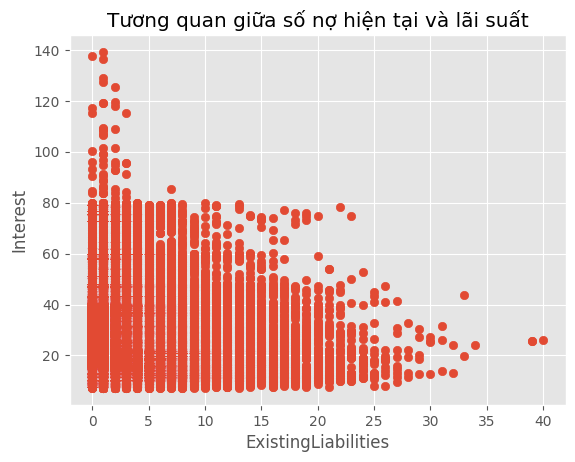

In [16]:
# Tương quan giữa thu nhập và số tiền phải trả hàng tháng
plt.scatter( x = Df['ExistingLiabilities'], y = Df['Interest'])

# Đặt tiêu đề và nhãn trục
plt.title("Tương quan giữa số nợ hiện tại và lãi suất")
plt.xlabel("ExistingLiabilities")
plt.ylabel("Interest")

Text(0, 0.5, 'Interest')

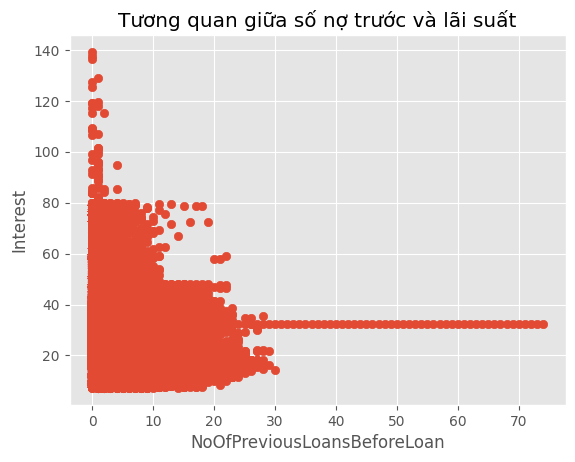

In [17]:
plt.scatter( x = Df['NoOfPreviousLoansBeforeLoan'], y = Df['Interest'])

# Đặt tiêu đề và nhãn trục
plt.title("Tương quan giữa số nợ trước và lãi suất")
plt.xlabel("NoOfPreviousLoansBeforeLoan")
plt.ylabel("Interest")

Nhận thấy rằng, thu nhập càng cao thì mức lã suất sẽ thấp hơn, thu nhập càng thấp thì mức lãi suất sẽ càng cao.

Text(0.5, 0, 'EAD1')

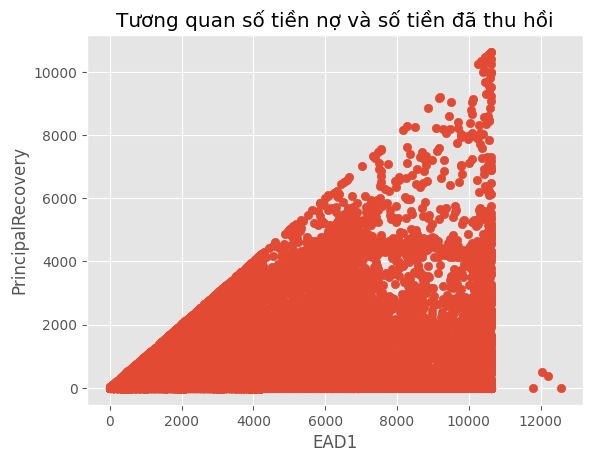

In [38]:
# Tương quan giữa số tiền đã nợ và số tiền đã thu hồi
plt.scatter( x = Df['EAD1'], y = Df['PrincipalRecovery'])

# Đặt tiêu đề và nhãn trục
plt.title("Tương quan số tiền nợ và số tiền đã thu hồi")
plt.ylabel("PrincipalRecovery")
plt.xlabel("EAD1")

Text(0.5, 0, 'Interest')

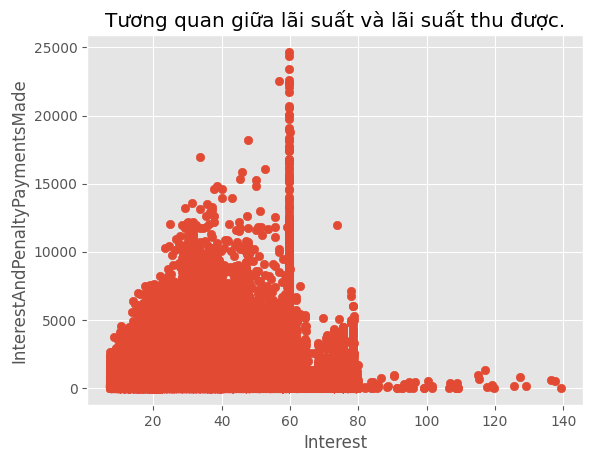

In [5]:
# Tương quan giữa số tiền đã nợ và số tiền đã thu hồi
plt.scatter( x = Df['Interest'], y = Df['InterestAndPenaltyPaymentsMade'])

# Đặt tiêu đề và nhãn trục
plt.title("Tương quan giữa lãi suất và lãi suất thu được.")
plt.ylabel("InterestAndPenaltyPaymentsMade")
plt.xlabel("Interest")

In [7]:
# Tương quan số tiền vay, lãi suất,thời hạn, điểm tin dụng, số nợ hiện có
df_test = pd.concat([Df['Amount'], Df['Interest'], Df['LoanDuration'],Df['MonthlyPayment'], Df['IncomeTotal']], axis = 1)
df_test

,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal
0,6911,27.34,60,223.58,1200.0
1,531,28.01,60,17.36,600.0
2,531,38.63,60,19.99,1200.0
3,531,39.45,60,20.17,1200.0
4,2339,43.13,60,93.07,600.0
...,...,...,...,...,...
222760,4250,27.80,36,189.51,1700.0
222761,530,34.38,36,25.56,701.0
222762,1380,14.48,48,42.64,1000.0
222763,1355,51.39,60,159.00,1400.0


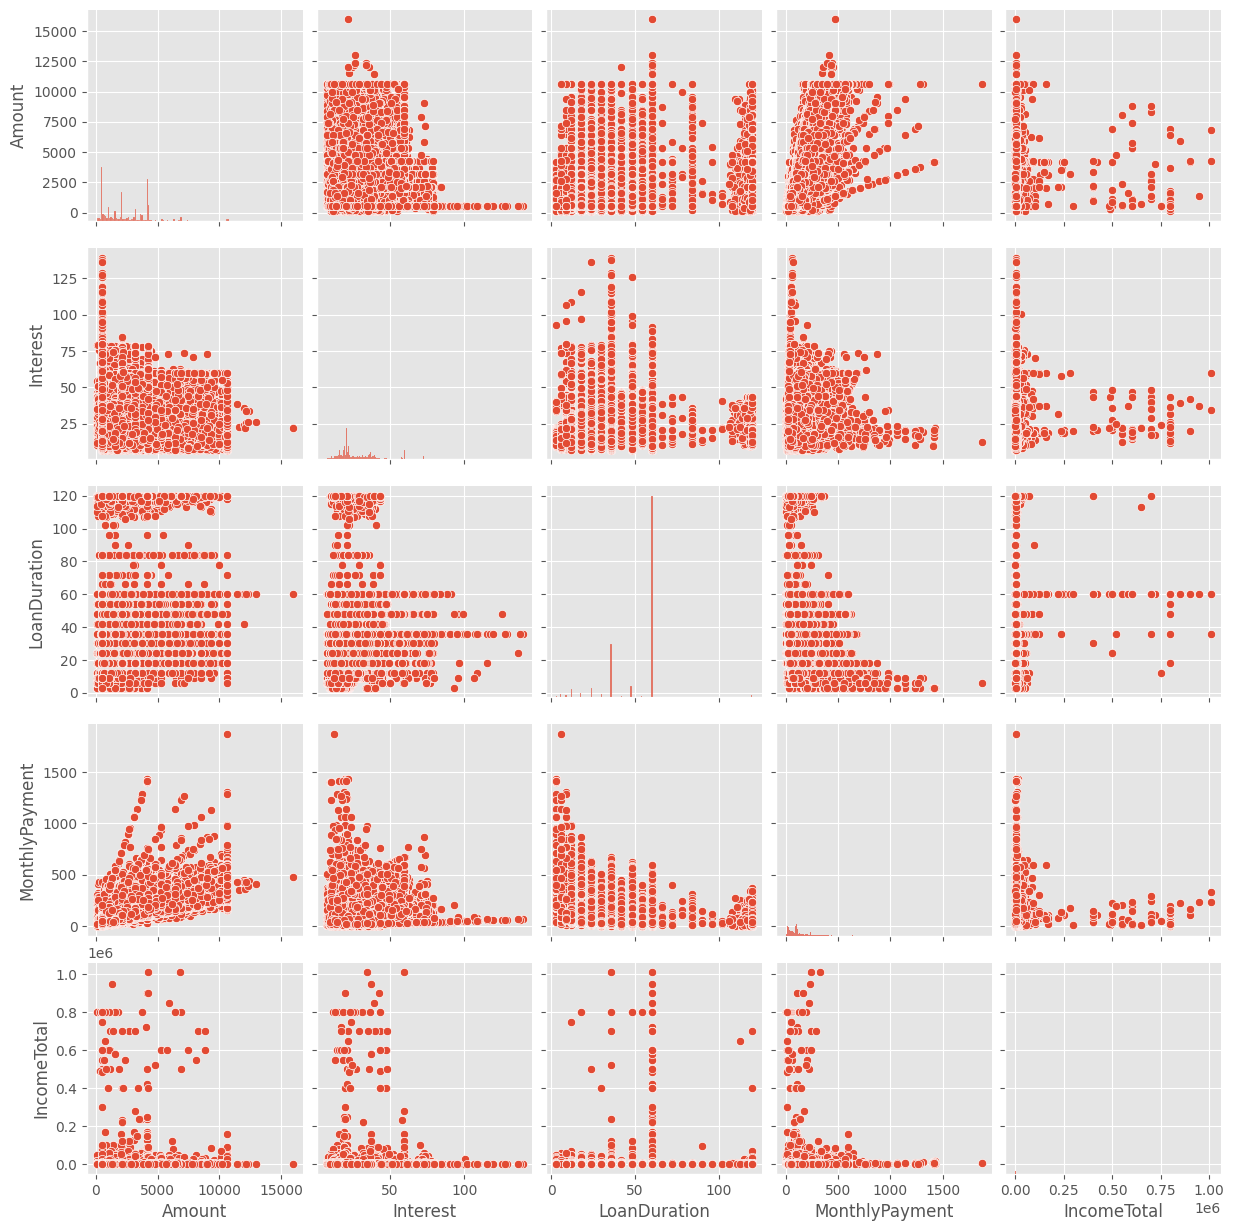

In [8]:
sns.pairplot(df_test)

In [12]:
df_test1 = pd.concat([ Df['Interest'], Df['ExistingLiabilities'], Df['NoOfPreviousLoansBeforeLoan']], axis = 1)
df_test1

,Interest,ExistingLiabilities,NoOfPreviousLoansBeforeLoan
0,27.34,0,0.0
1,28.01,0,0.0
2,38.63,1,2.0
3,39.45,2,3.0
4,43.13,1,1.0
...,...,...,...
222760,27.80,0,0.0
222761,34.38,2,1.0
222762,14.48,1,0.0
222763,51.39,1,1.0


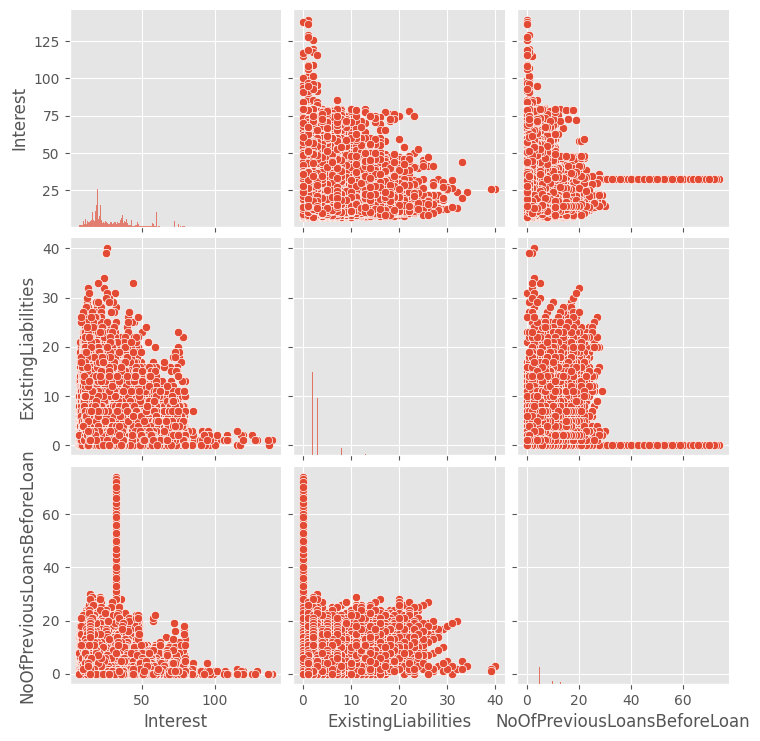

In [13]:
sns.pairplot(df_test1)

In [ ]:
Df1= Df[['BidsPortfolioManager','BidsApi','BidsManual','Age','AppliedAmount','Amount','Interest','LoanDuration',
        'MonthlyPayment','IncomeTotal', 'ExistingLiabilities','LiabilitiesTotal','PrincipalPaymentsMade',
        'InterestAndPenaltyPaymentsMade','PrincipalBalance','InterestAndPenaltyBalance',
        'NoOfPreviousLoansBeforeLoan','AmountOfPreviousLoansBeforeLoan','PreviousEarlyRepaymentsCountBeforeLoan','EAD1','PrincipalRecovery',
        'InterestRecovery']]

<AxesSubplot:>

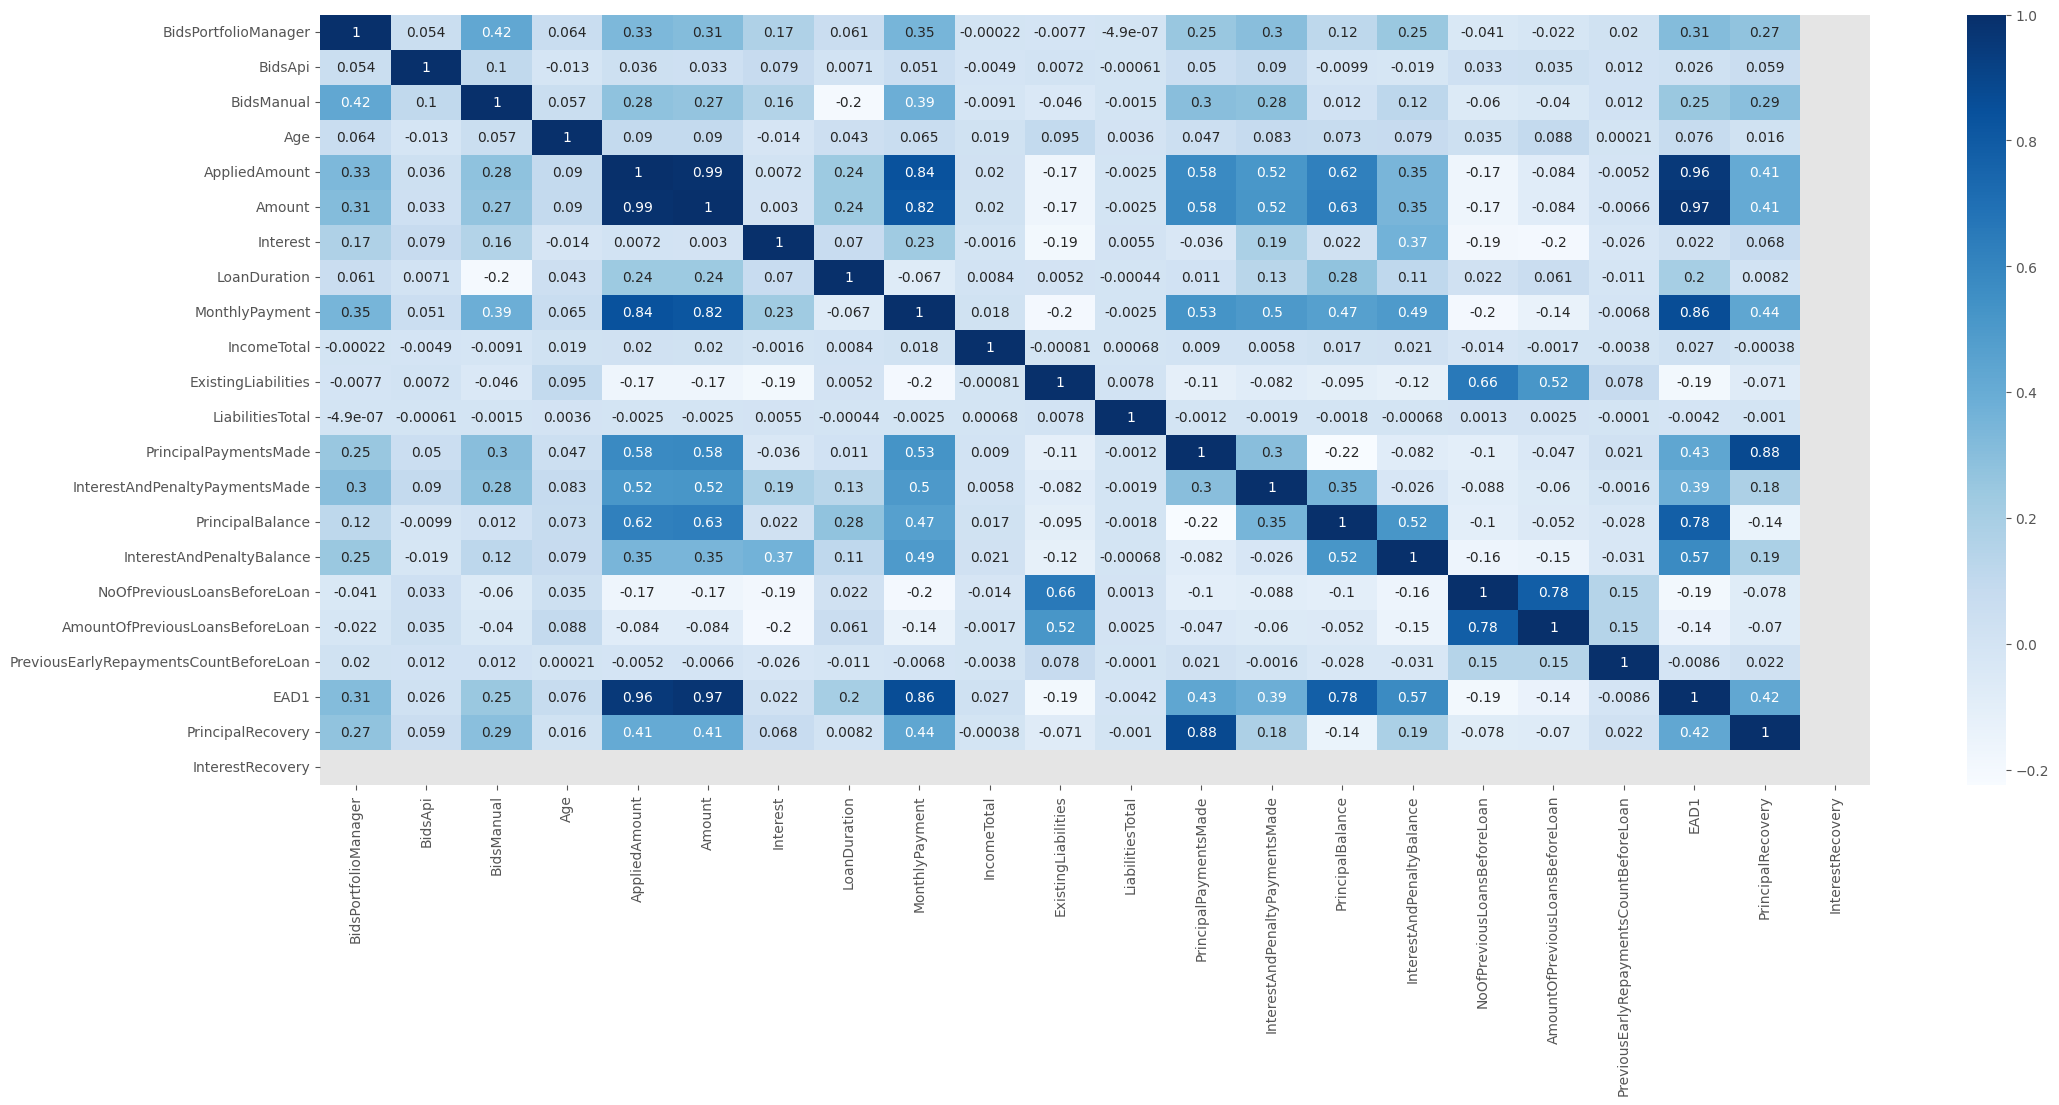

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap( Df1.corr(), annot=True, cmap='Blues')

Nhìn vào biểu đồ ta thấy được, có mối tương quan lớn giữa số tiền phải trả hàng tháng với số tiền vay
- có mối tương quan giữa số tiền gốc và lãi đã trả với, số tiền chưa trả với số tiên vay với lãi suất
- có mỗi tương quan giữa lãi suất, tiền gửi hàng tháng
- Độ tuổi không ảnh hưởng nhiều đến số tiền cho vay và lãi suất
- Thời hạn khoản vay có ảnh hưởng đến số tiền cho vay
- Số tiền, lãi suất đều có ảnh hưởng đến số lượng các nhà đầu tư
- Số nợ hiện tại, số tiền nợ hiện tại không ảnh hưởng đến khoản vay hiện nay
- số nợ trước kia, số tiền nợ trước kia không ảnh hưởng đến khoản vay hiện tại
- không có sự ảnh hưởng nhiều từ mức thu  nhập hàng tháng đến khoản vay
- có mối tương giữa số tiền nợ gốc với số tiền tiền phải trả hàng tháng, và lãi suất

<AxesSubplot:>

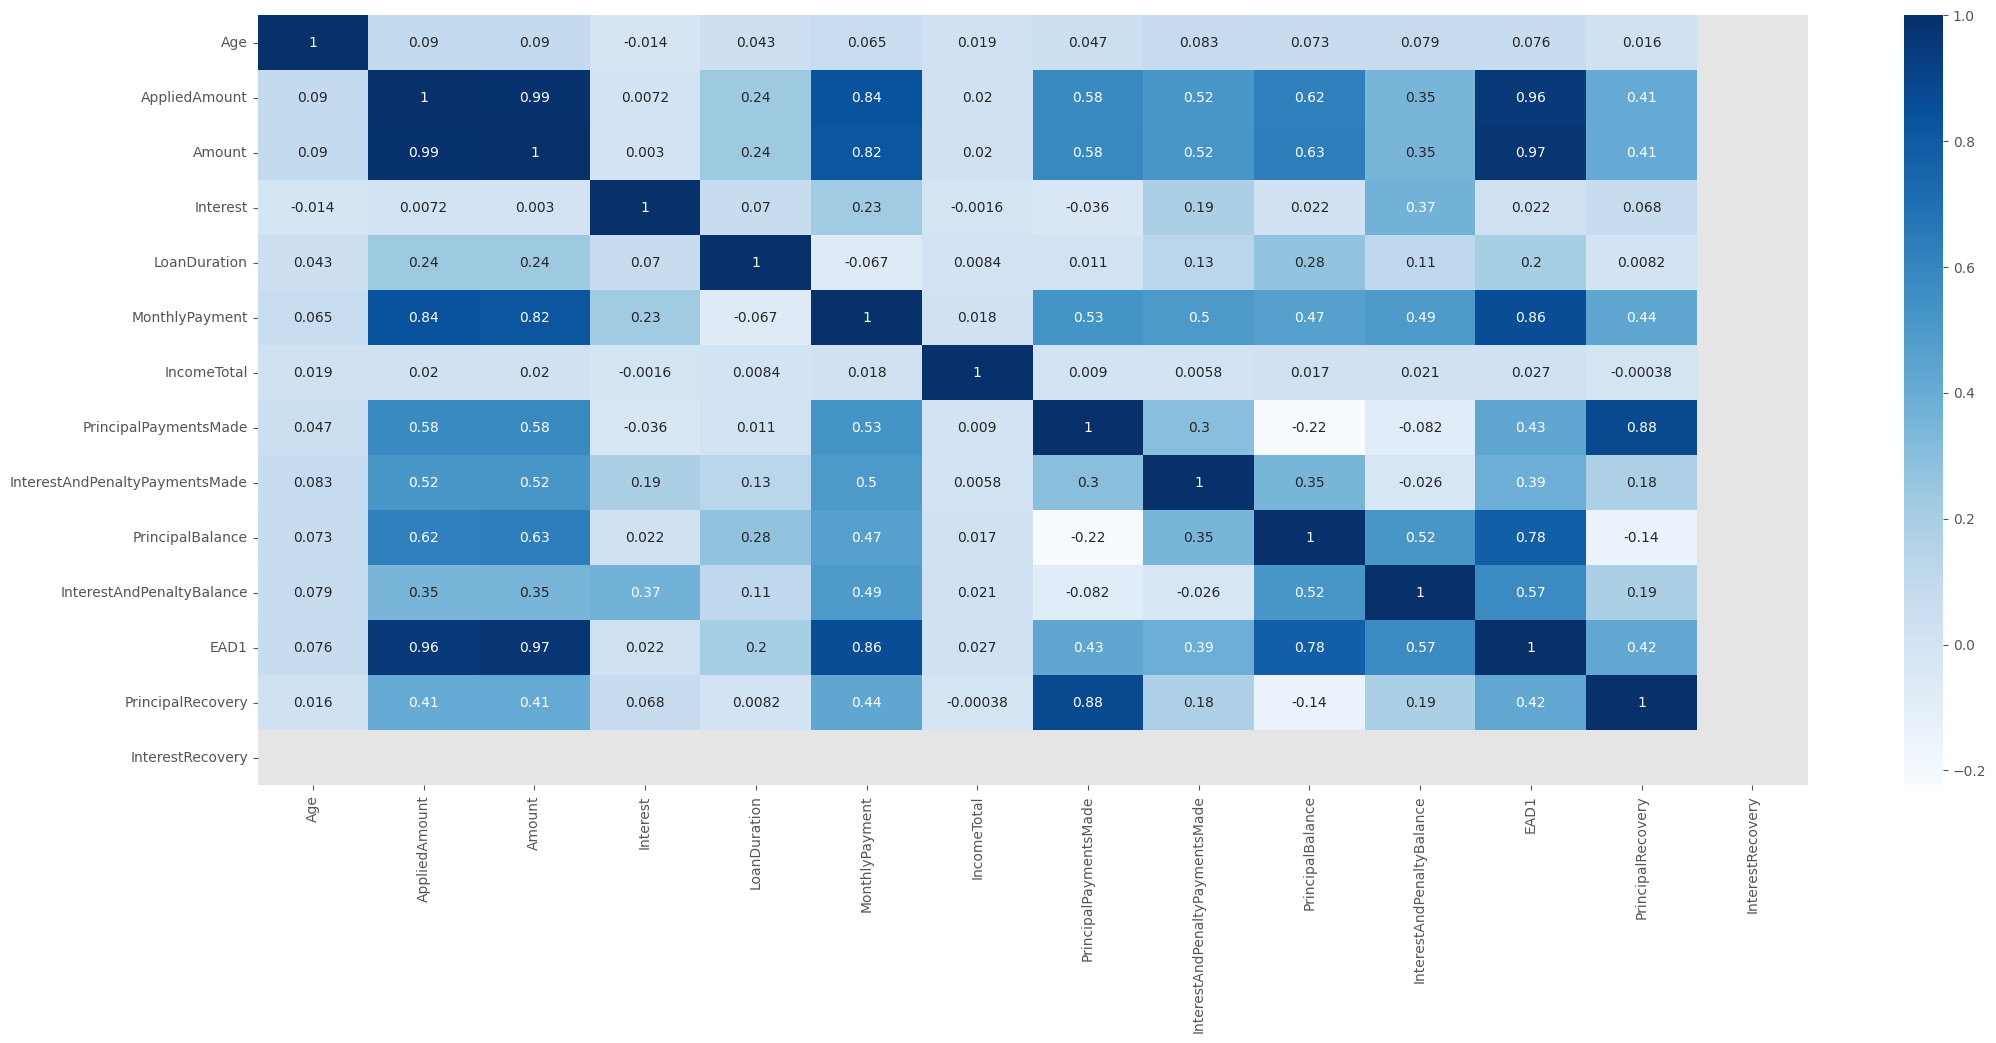

In [5]:
Df1= Df[['Age','AppliedAmount','Amount','Interest','LoanDuration',
        'MonthlyPayment','IncomeTotal','PrincipalPaymentsMade',
        'InterestAndPenaltyPaymentsMade','PrincipalBalance','InterestAndPenaltyBalance',
        'EAD1','PrincipalRecovery',
        'InterestRecovery']]
plt.figure(figsize=(25,10))
sns.heatmap( Df1.corr(), annot=True, cmap='Blues')